# Q1 : Explore clinical variables

## 1.1 Import and explore the clinical data

In [61]:
# Import TSV file into data frame
clinical_data <- read.table("Aorta/clinical_data.tsv", 
                           sep = "\t", header=TRUE)

In [2]:
head(clinical_data, 3)

SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72,227,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66,203,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66,160,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326


In [62]:
summary(clinical_data)

    SMPLID             SUBJID             COHORT               SEX       
 Length:280         Length:280         Length:280         Min.   :1.000  
 Class :character   Class :character   Class :character   1st Qu.:1.000  
 Mode  :character   Mode  :character   Mode  :character   Median :1.000  
                                                          Mean   :1.357  
                                                          3rd Qu.:2.000  
                                                          Max.   :2.000  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   Max.   :273.8   Max.   :34.99  
   SMPTHNTS            TRIS

In [ ]:
library(dplyr)

We want to convert the character variables into factors

In [3]:
# Convert character columns to factors using dplyr
clinical_data <- clinical_data %>%
  mutate_if(is.character, as.factor)

The problem is that some categorical variables are still considered as double (SEX, DTHHRDY and DTHVNT)

In [4]:
# Convert SEX, DTHHRDY and DTHVNT to factors
clinical_data$SEX <- as.factor(clinical_data$SEX)
clinical_data$DTHHRDY <- as.factor(clinical_data$DTHHRDY)
clinical_data$DTHVNT <- as.factor(clinical_data$DTHVNT)

In [6]:
summary(clinical_data)

             SMPLID           SUBJID                  COHORT    SEX    
 GTEX.111YS.0526:  1   GTEX.111YS:  1   Organ Donor (OPO):143   1:180  
 GTEX.1122O.1126:  1   GTEX.1122O:  1   Postmortem       :137   2:100  
 GTEX.1128S.0326:  1   GTEX.1128S:  1                                  
 GTEX.117XS.0426:  1   GTEX.117XS:  1                                  
 GTEX.117YW.0226:  1   GTEX.117YW:  1                                  
 GTEX.11DXX.0426:  1   GTEX.11DXX:  1                                  
 (Other)        :274   (Other)   :274                                  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   M

Everything looks fine with the clinical dataset. We can also see that we have only "NO_REPORT" for the SMPTHNTS variable. We can remove it from the dataset to have a bit more clarity.

In [5]:
# Remove the SMPTHNTS column
clinical_data$SMPTHNTS <- NULL

We are good to go !

## 1.2 How are clinical variables distributed ?

### 1.2.1 Distribution of numerical variables 

There are 5 numerical variables : AGE, HGHT, WGHT, BMI and TRISCHD

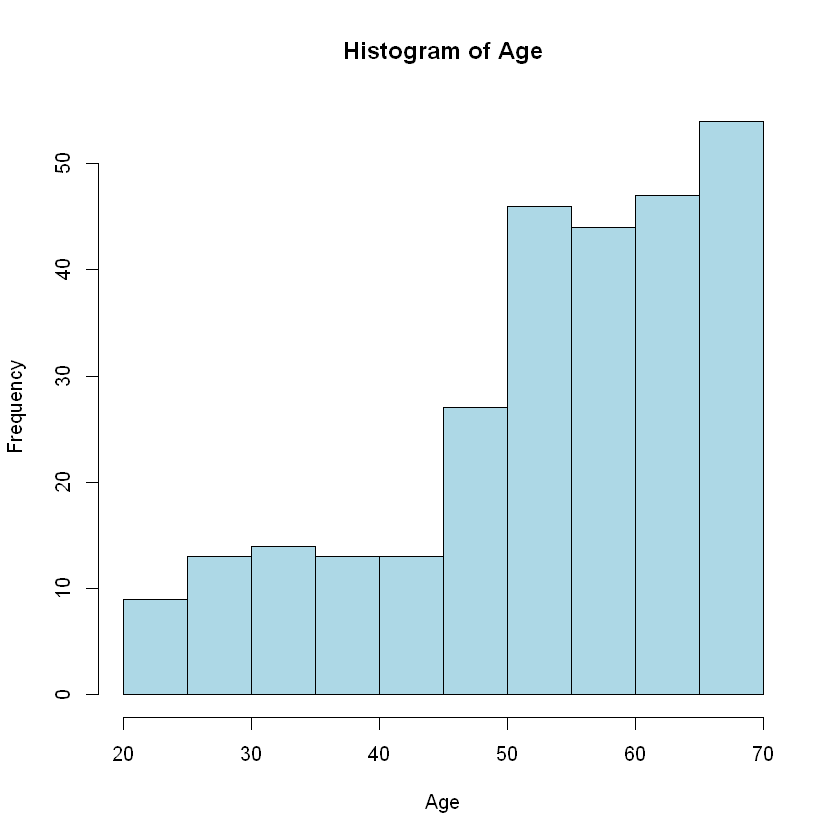

In [11]:
# Histograms for numerical variables
hist(clinical_data$AGE, main="Histogram of Age", xlab="Age", col="lightblue")

The dataset is represented by a bigger proportion of old person in GTEx as discussed during the theoritical course. 

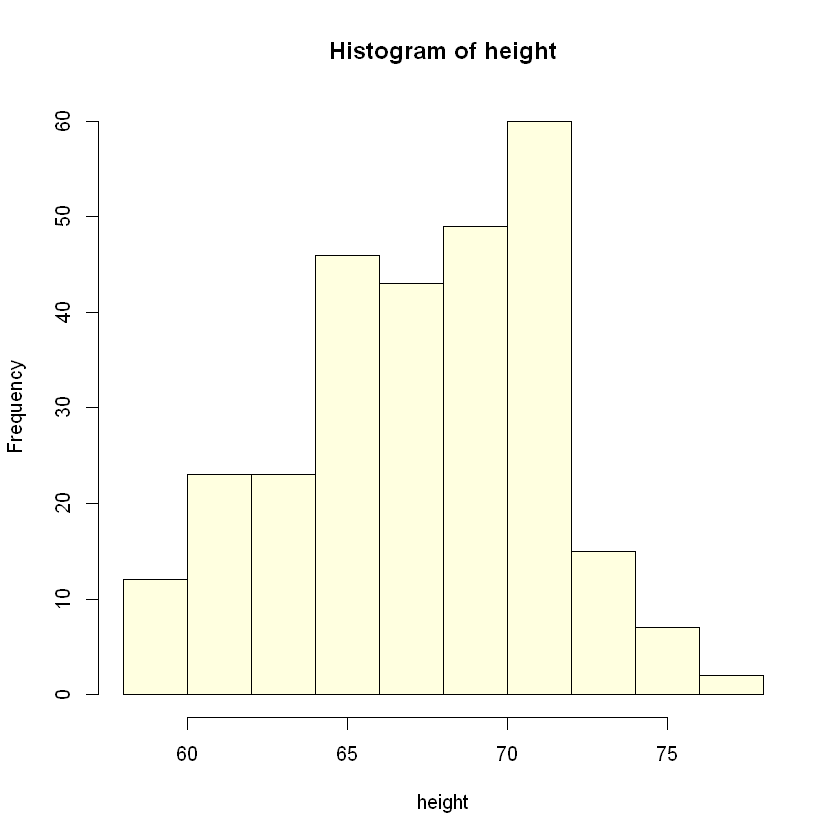

In [52]:
# Histograms for numerical variables
hist(clinical_data$HGHT, main="Histogram of height", xlab="height", col="lightyellow")

We see that the distribution of the height is not completly normal because we have 180 men and 100 women in the dataset which shifts the distribution to the right as men are in average taller than women.

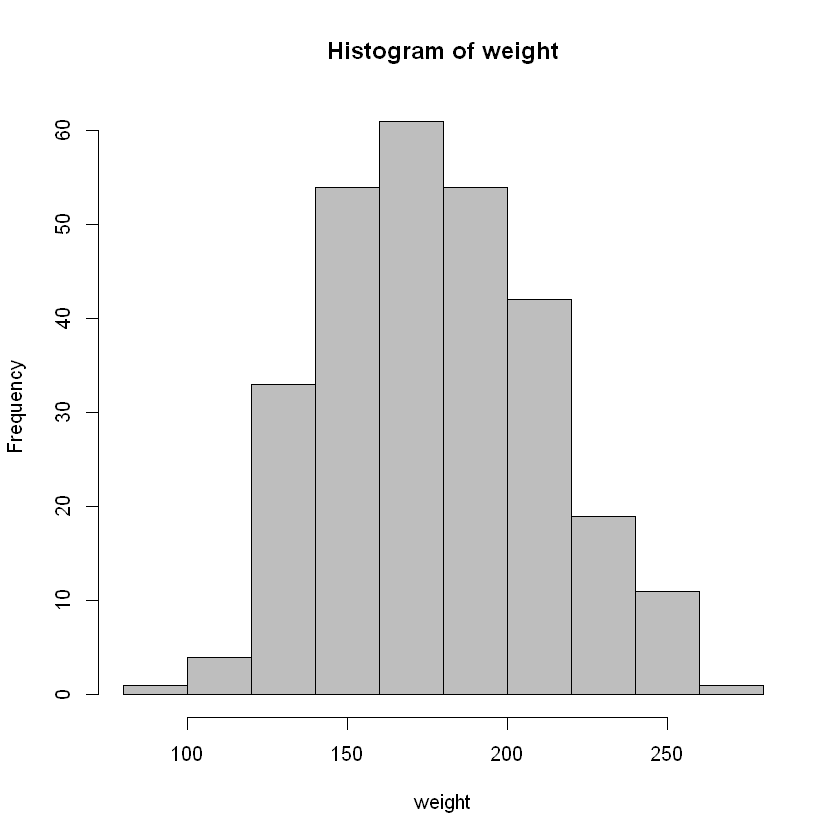

In [55]:
# Histograms for numerical variables
hist(clinical_data$WGHT, main="Histogram of weight", xlab="weight", col="gray")

Again, the distribution is a little bit shifted to right as we have more men than women. 

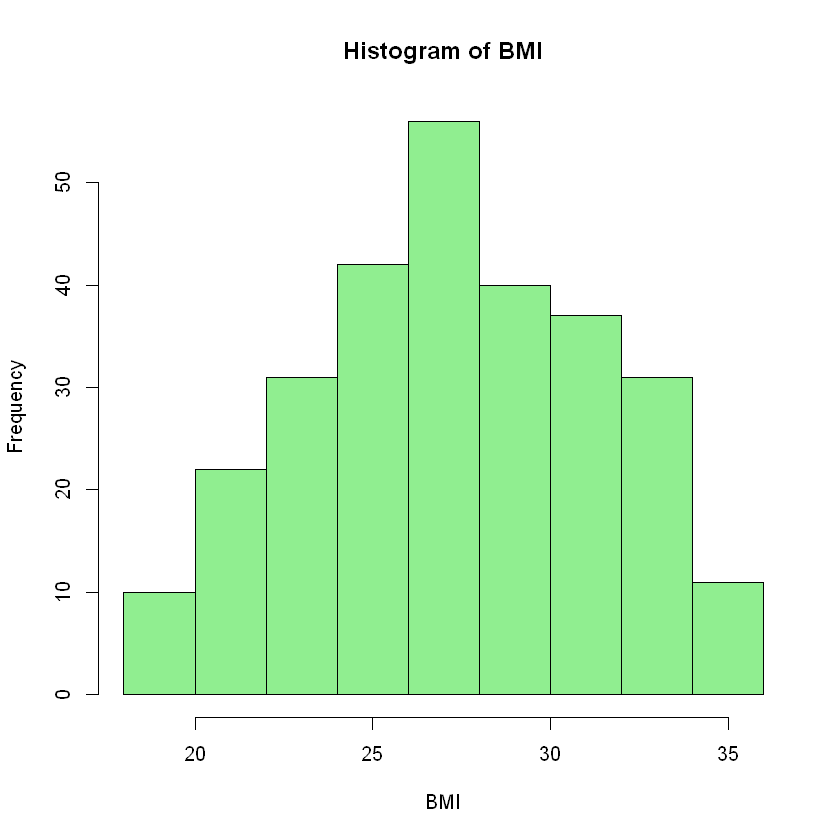

In [54]:
hist(clinical_data$BMI, main="Histogram of BMI", xlab="BMI", col="lightgreen")

We also have a normal distribution of the BMI.

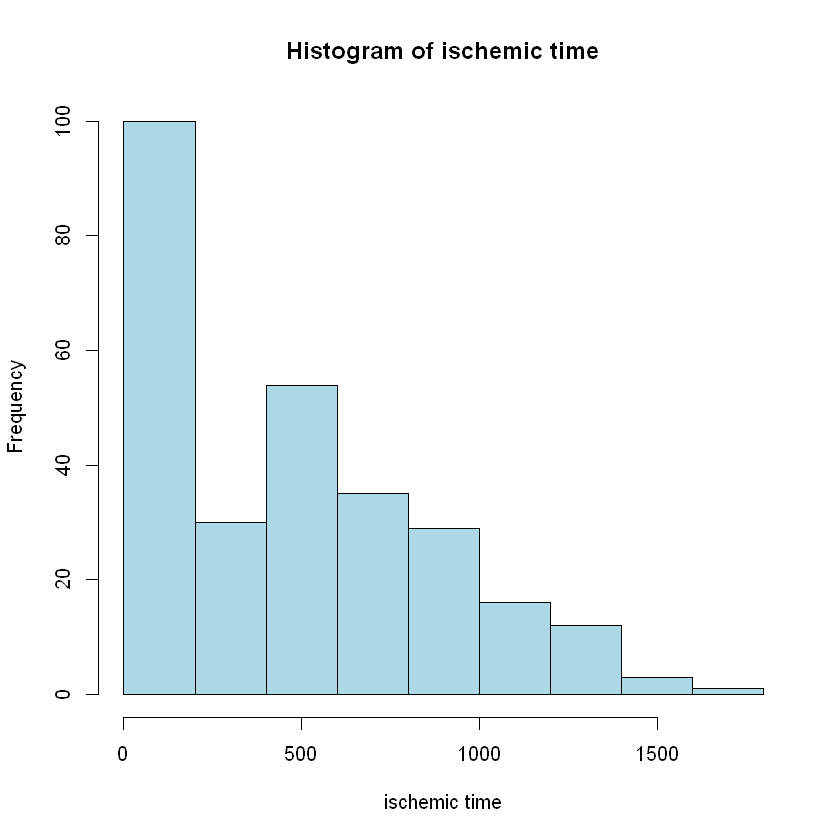

In [58]:
hist(clinical_data$TRISCHD, main="Histogram of ischemic time", xlab="ischemic time", col="lightblue")

We can see that we have a large number of people with very small ischemic time. We can explain that by looking at the variable COHORT. We have a quite equal repartition of organ donor and post mortem patients (143 vs 137). The 143 organ donors will have a low ischemic time (often less than 1 hour) which leads to a large proportion of people with an ischemic time between 0 and 60 minutes. However, the ischemic time of post portem patients will be way more disparate as we can see on the histogram. 

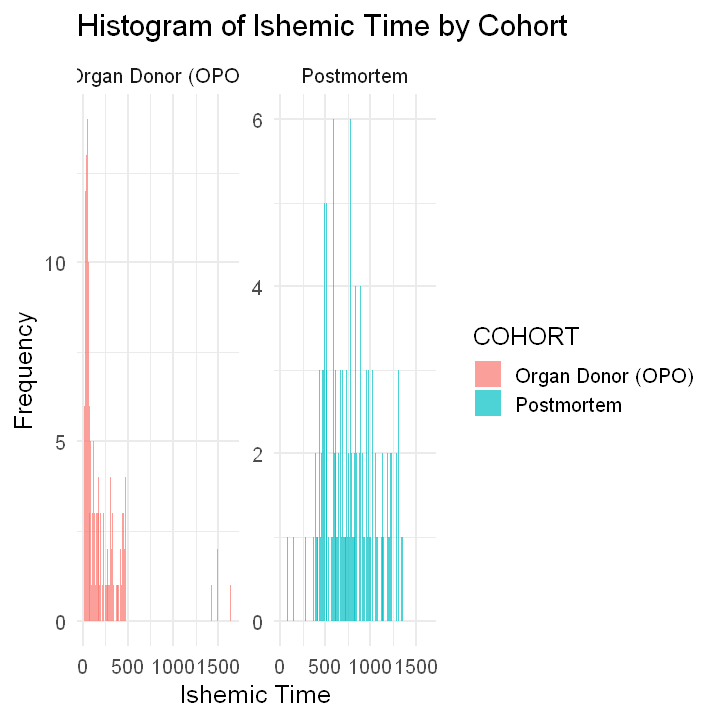

In [66]:
library(ggplot2)
ggplot(clinical_data, aes(x = TRISCHD, fill = COHORT)) +
  geom_histogram(binwidth = 10, alpha = 0.7, position = "identity") +
  facet_wrap(~ COHORT, scales = "free_y") +
  labs(title = "Histogram of Ishemic Time by Cohort",
       x = "Ishemic Time",
       y = "Frequency") +
  theme_minimal(base_size = 15)

We can see that indeed, the organ donor group has the propensity to have lower ischemic time compared to the Postmortem group and that the distribution has less variation and is more skewed to the left. 

### 1.2.2 Distribution of categorical variables 

They are 4 categorical variables : SEX, COHORT, DTHHRDY and DTHVNT.


  1   2 
180 100 

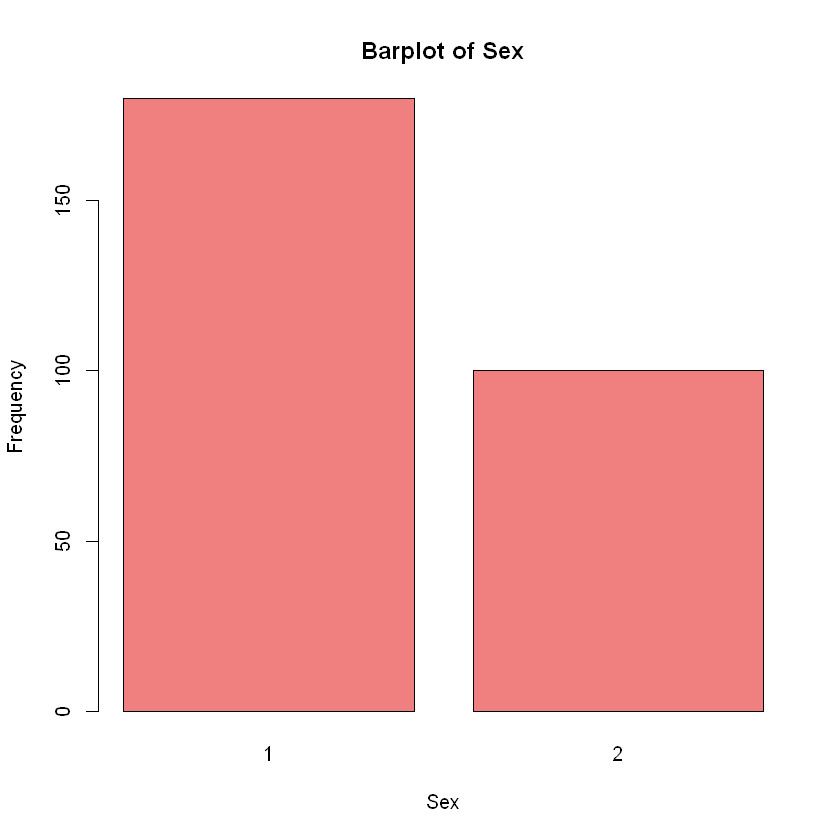

In [98]:
# Frequency table and barplot for SEX
table(clinical_data$SEX)
barplot(table(clinical_data$SEX), main="Barplot of Sex", xlab="Sex", ylab="Frequency", col="lightcoral")

We can see that we have 180 males (1) and 100 females (2) in our dataset of 280 samples which is almost twice more males than females. 


Organ Donor (OPO)        Postmortem 
              143               137 

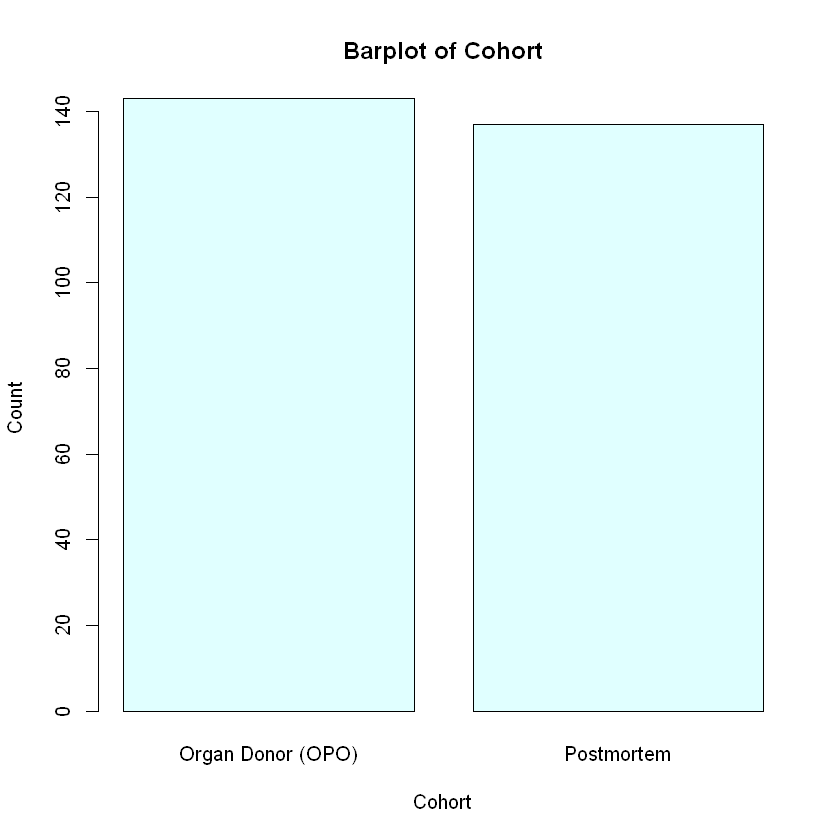

In [100]:
# Frequency table and barplot for COHORT
table(clinical_data$COHORT)
barplot(table(clinical_data$COHORT), main="Barplot of Cohort", xlab="Cohort", ylab="Count", col="lightcyan")

We almost have an equal repartition of Organ donor (OPO) and Post mortem patients. 


  0   1   2   3   4 
156   8  77  13  26 

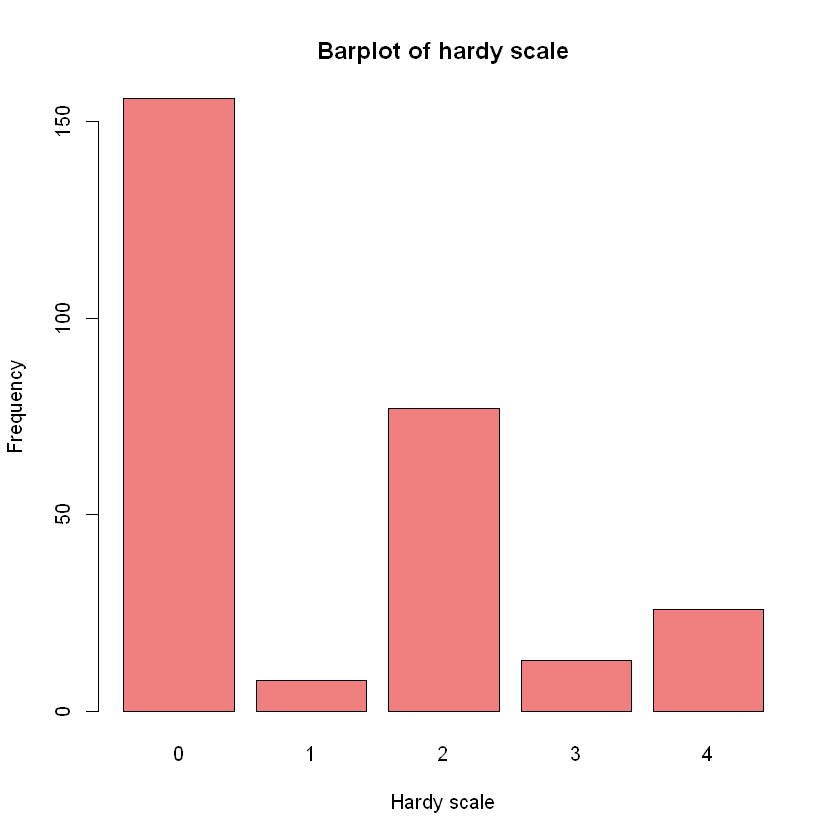

In [107]:
# Frequency table and barplot for DTHHRDY
table(clinical_data$DTHHRDY)
barplot(table(clinical_data$DTHHRDY), main="Barplot of hardy scale", xlab="Hardy scale", ylab="Frequency", col="lightcoral")

DTHHRDY variable corresponds to the hardy scale i.e. the circumstances of death which is summarized by a factor from 0 to 4 where 0 = Ventilator case, 1 = Violent and fast death, 2 = Fast death of natural causes, 3 = Intermediate death and 4 = slow death. 

The highest circumstances frequency of death is from ventilator case (156) followed by fast death of natural causes (77), then by slow death (26), then by intermediate death (13) and finally by violent and fast death (8)


  0   1  99 
116 162   2 

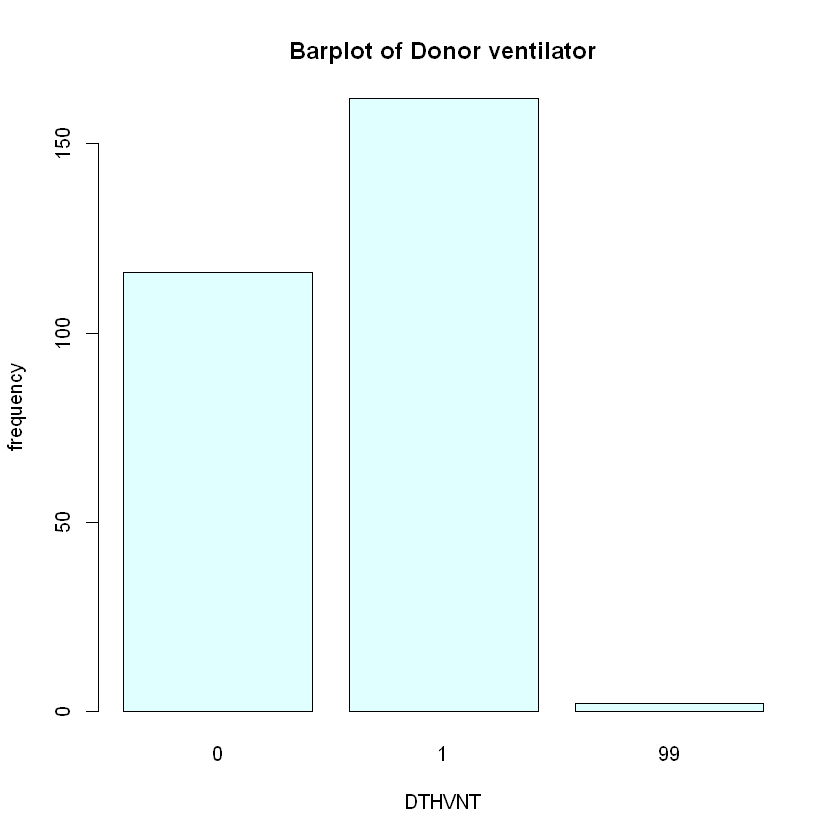

In [105]:
# Frequency table and barplot for DTHVNT
table(clinical_data$DTHVNT)
barplot(table(clinical_data$DTHVNT), main="Barplot of Donor ventilator", xlab="DTHVNT", ylab="frequency", col="lightcyan")

DTHVNT variable gives the information if the donor was on a ventilator (medical device) immediatly prior to death which is summarized by four differents factors : 0 = No, 1 = Yes, 98 = Not reported and 99 = Unknown. 

We can see that we have 162 patients that have been under a ventilator before death, 116 which were not and 2 that are unknown. 

## 1.3 How are clinical variables correlated ?

### 1.3.1 Correlations between numerical variables

We can start by exploring the correlation between the 5 numerical variables. 

In [111]:
# The variables from the 5th column to 9th column are the 5 numerical variables
numerical_clinical_data<-clinical_data[c(5:9)]
head(numerical_clinical_data)

AGE,HGHT,WGHT,BMI,TRISCHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62,72.0,227,30.78,74
64,66.0,203,32.76,35
66,66.0,160,25.82,816
64,71.0,220,30.68,848
58,72.0,220,29.83,785
66,64.5,128,21.63,56


,AGE,HGHT,WGHT,BMI,TRISCHD
AGE,1.00000000,0.064089264,0.0973484,0.071131909,0.22927245
HGHT,0.06408926,1.000000000,0.6121418,-0.006819023,0.14390524
WGHT,0.09734840,0.612141786,1.0000000,0.780945124,0.11913930
BMI,0.07113191,-0.006819023,0.7809451,1.000000000,0.03324977
TRISCHD,0.22927245,0.143905243,0.1191393,0.033249770,1.00000000


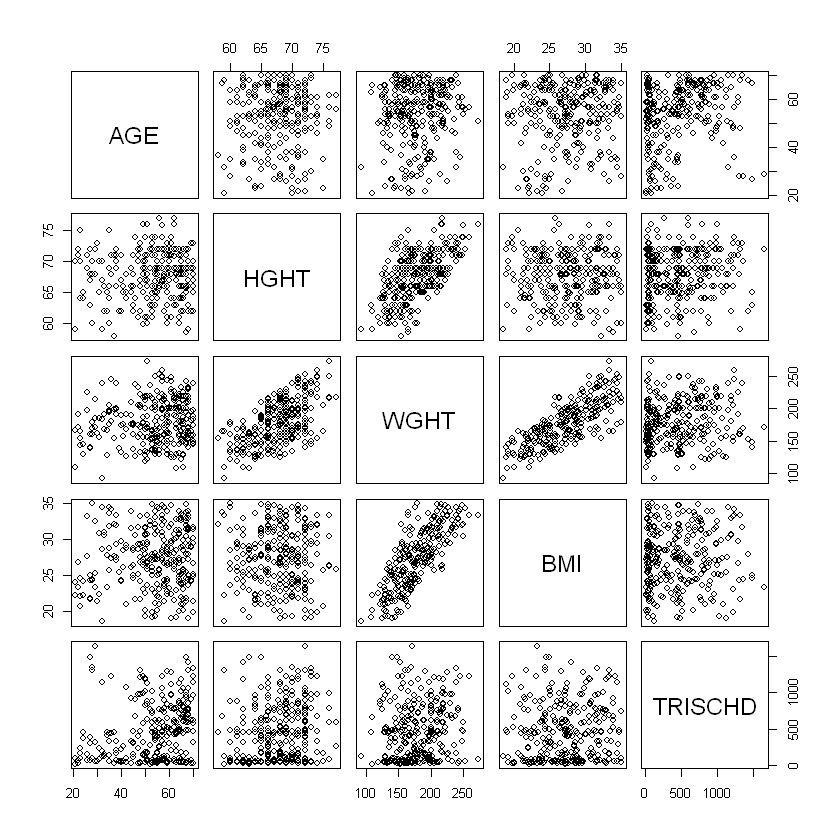

In [115]:
pairs(numerical_clinical_data)
cor(numerical_clinical_data)

AGE looks to be a little bit positively correlated to TRISCHD.

HGHT is highly positively correlated to WGHT which was expected as taller people have a higher tendency to be heavier. HGHT seems also to be a bit positively correlated to TRISCHD.

WGHT is highly positively correlated to HGHT (logical as HGHT is highly correlated to WGHT) and to BMI which is expected as heavier people tend to have a higher BMI. WGHT seems also to be a bit positively correlated to TRISCHD.

BMI is highly positively correlated to WGHT but not at all to TRISCHD.

As said above, TRISCHD is a little bit positively correlated to AGE, HGHT and WGHT. It suggests that older, taller and heavier people will tend to have an ischemic time a little bit higher than normal.

### 1.3.2 Correlations between numerical and categorical variables

We want to see if the value of the numerical variables depends somehow on the levels of the categorical variables.

As reminder the 5 numerical variables are AGE, HGHT, WGHT, BMI and TRISCHD and the 4 categorical variables are SEX, COHORT, DTHHRDY and DTHVNT.

Let's start by the AGE variable in fuction of the 4 categorical variables. 

We used the non parametric Kruskal-Wallis test to assess the "correlation" between the numerical variables and categorical variables. We did not used ANOVA for this purpose because ANOVA requires some conditions of applications (homoscedasticity and normality of the residues) that were not respected. Indeed, the Shapiro-Wilk test, that assesses the normality of the residuals, always returned a pvalue below the alpha treshold of 5% which indicates to reject the null hypothesis of normality. 

#### 1.3.2.1 AGE


	Kruskal-Wallis rank sum test

data:  AGE by SEX
Kruskal-Wallis chi-squared = 1.9821, df = 1, p-value = 0.1592


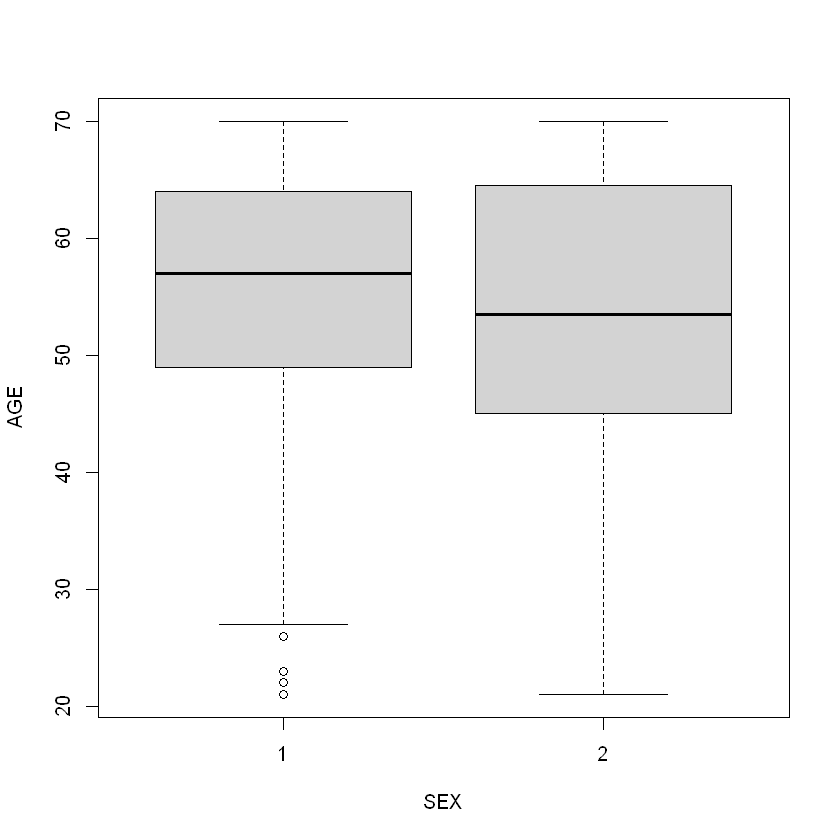

In [9]:
kruskal.test(AGE ~ SEX, data=clinical_data)
boxplot(AGE ~ SEX, data=clinical_data)

The Pvalue of the Kruskal-Wallis test is 0.159  which is under the treshold of alpha = 5%. It means that the AGE is not significantly different between the two sexes. 


	Kruskal-Wallis rank sum test

data:  AGE by COHORT
Kruskal-Wallis chi-squared = 42.838, df = 1, p-value = 5.947e-11


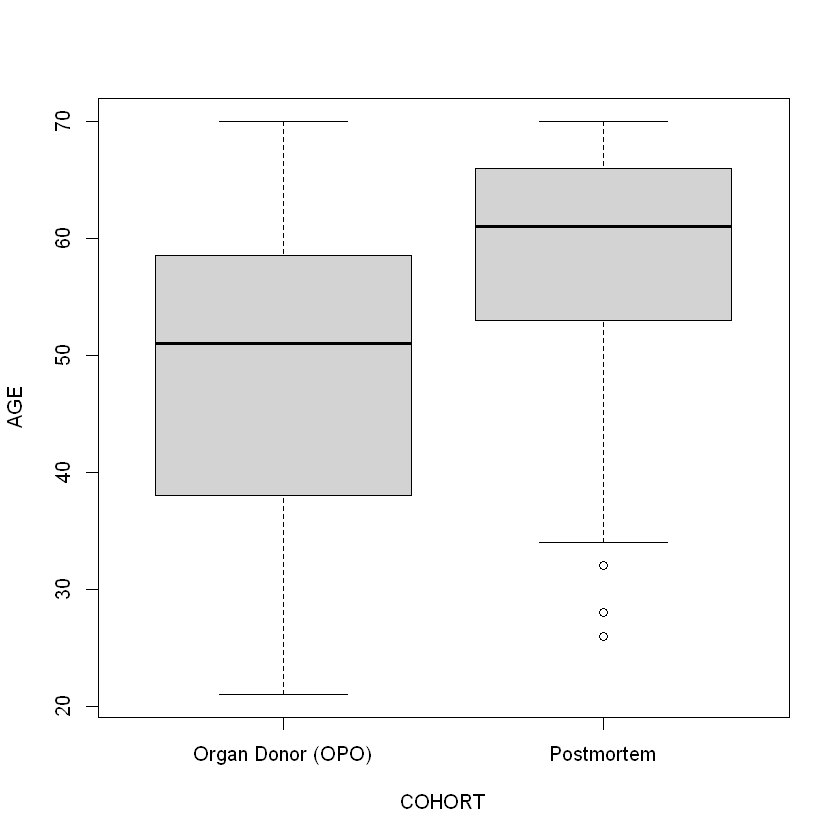

In [10]:
kruskal.test(AGE ~ COHORT, data=clinical_data)
boxplot(AGE ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  AGE by DTHHRDY
Kruskal-Wallis chi-squared = 53.759, df = 4, p-value = 5.912e-11


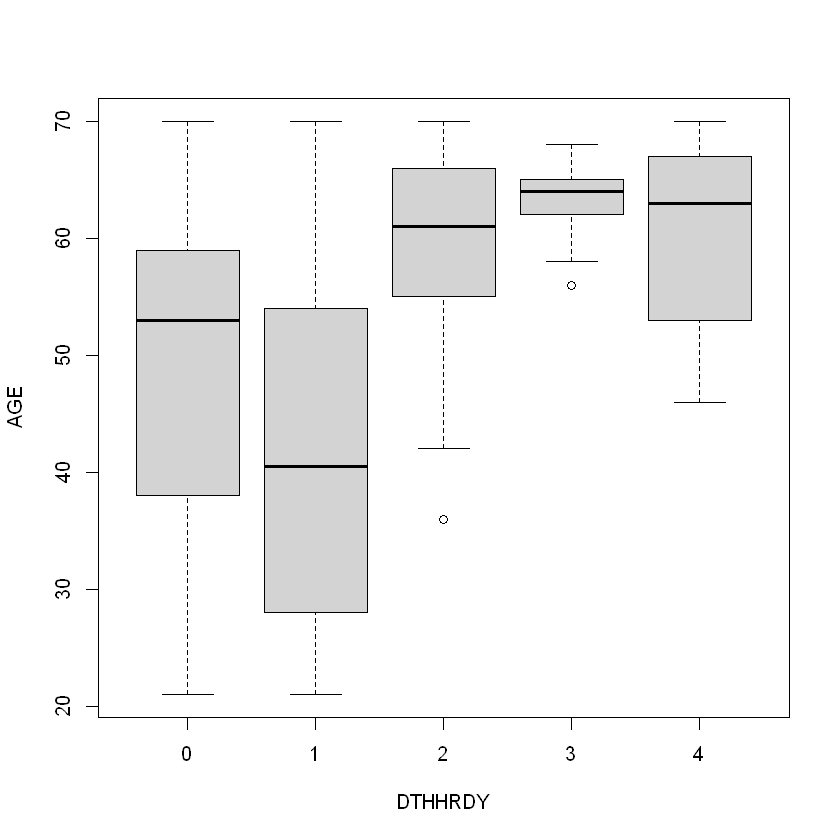

In [11]:
kruskal.test(AGE ~ DTHHRDY, data=clinical_data)
boxplot(AGE ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  AGE by DTHVNT
Kruskal-Wallis chi-squared = 40.537, df = 2, p-value = 1.576e-09


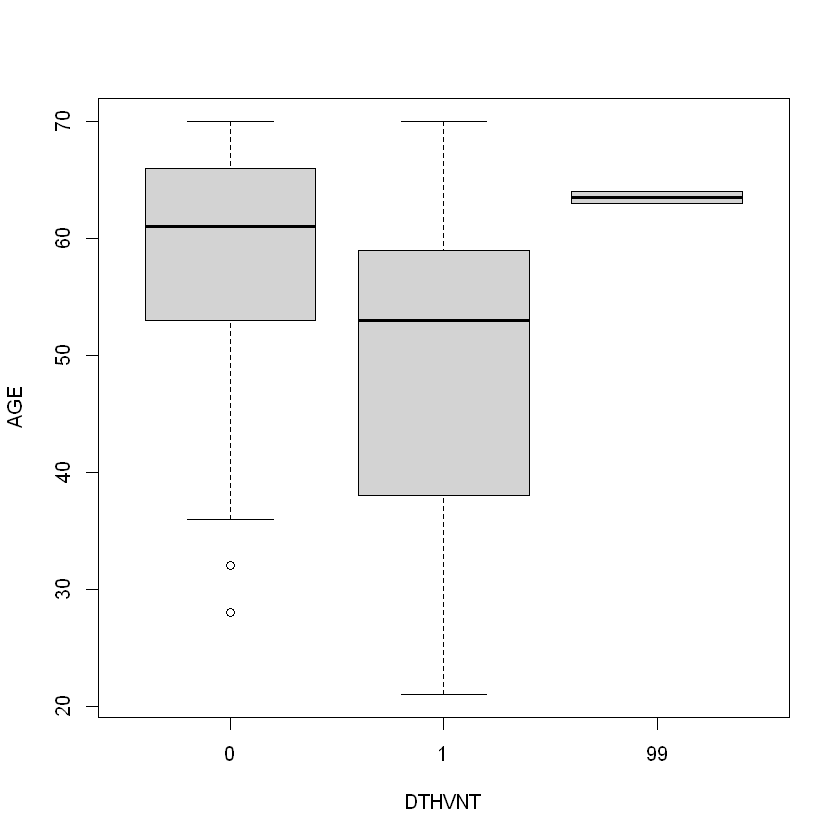

In [12]:
kruskal.test(AGE ~ DTHVNT, data=clinical_data)
boxplot(AGE ~ DTHVNT, data=clinical_data)

#### 1.3.2.2 HGHT


	Kruskal-Wallis rank sum test

data:  HGHT by SEX
Kruskal-Wallis chi-squared = 147.65, df = 1, p-value < 2.2e-16


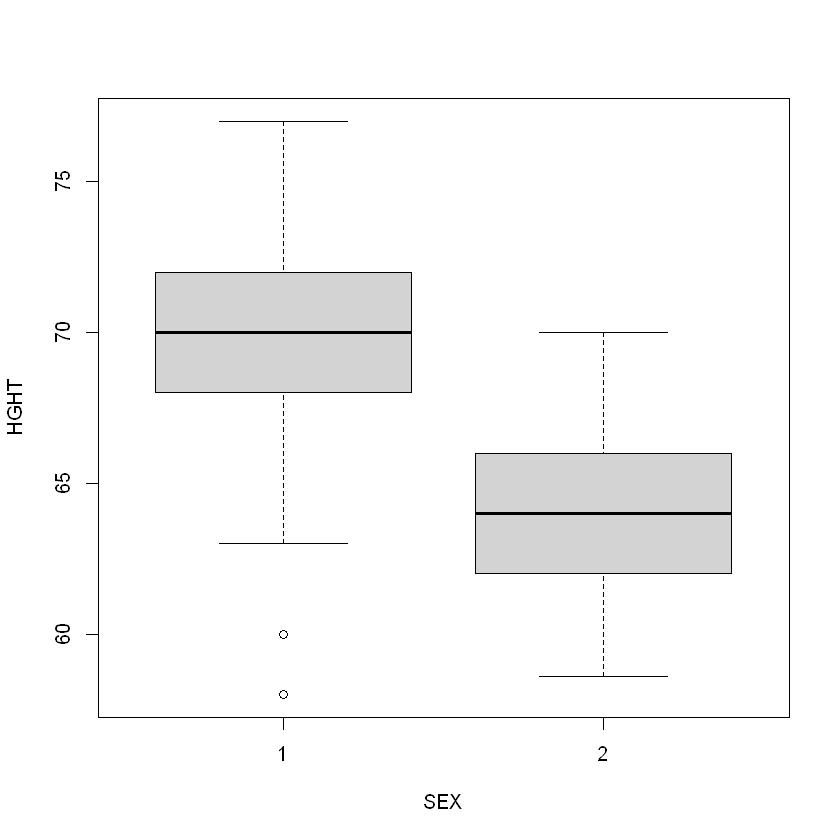

In [20]:
kruskal.test(HGHT ~ SEX, data=clinical_data)
boxplot(HGHT ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  HGHT by COHORT
Kruskal-Wallis chi-squared = 4.7196, df = 1, p-value = 0.02982


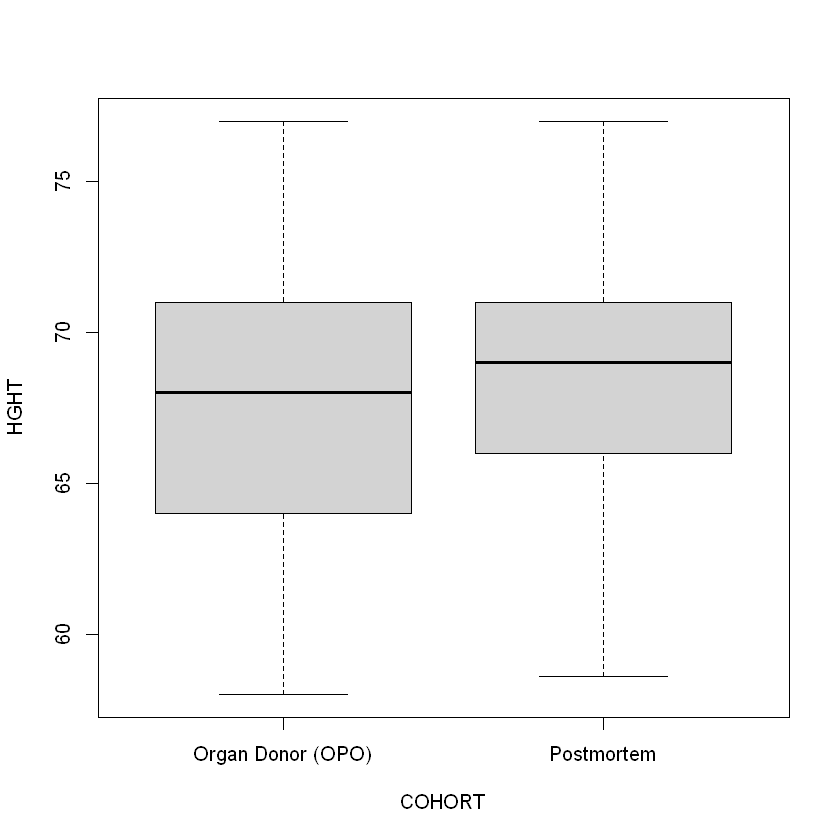

In [21]:
kruskal.test(HGHT ~ COHORT, data=clinical_data)
boxplot(HGHT ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  HGHT by DTHHRDY
Kruskal-Wallis chi-squared = 12.113, df = 4, p-value = 0.01653


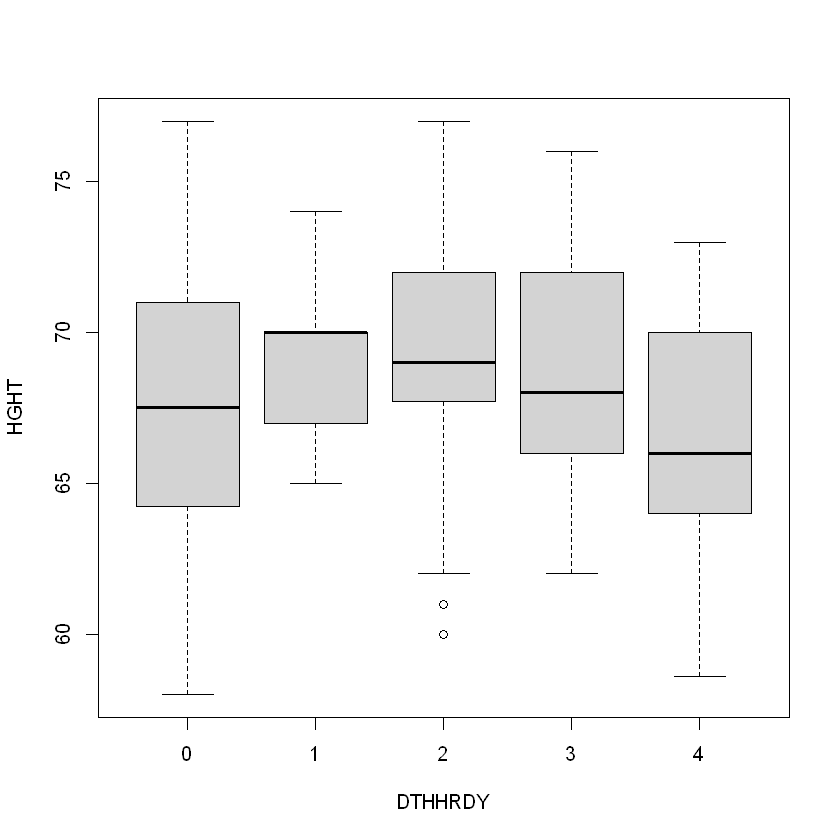

In [22]:
kruskal.test(HGHT ~ DTHHRDY, data=clinical_data)
boxplot(HGHT ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  HGHT by DTHVNT
Kruskal-Wallis chi-squared = 4.0813, df = 2, p-value = 0.1299


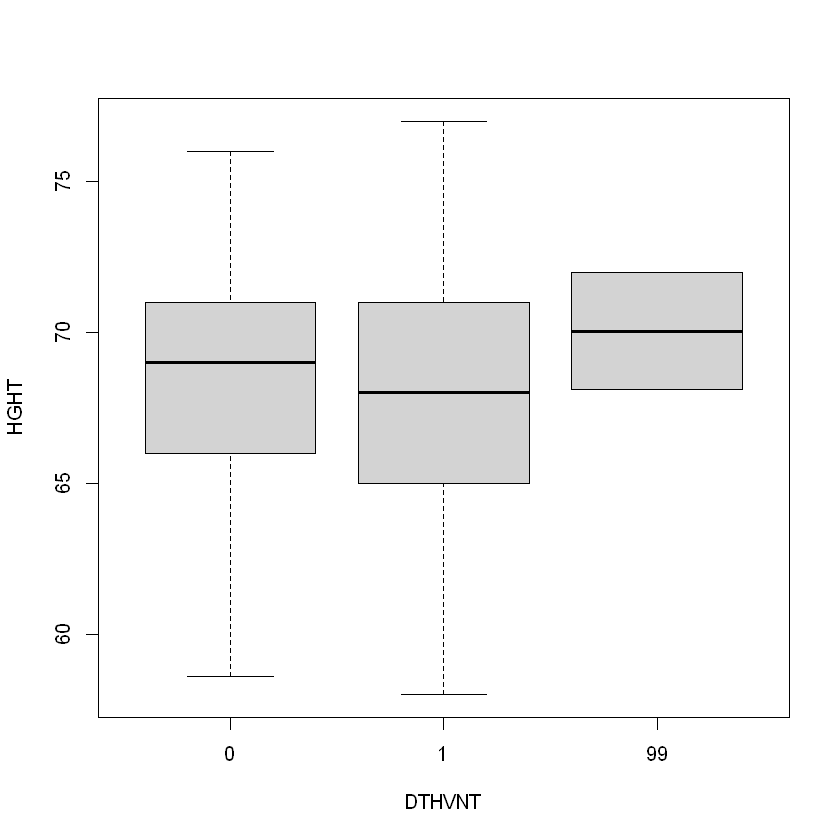

In [23]:
kruskal.test(HGHT ~ DTHVNT, data=clinical_data)
boxplot(HGHT ~ DTHVNT, data=clinical_data)

#### 1.3.2.2 WGHT


	Kruskal-Wallis rank sum test

data:  WGHT by SEX
Kruskal-Wallis chi-squared = 65.369, df = 1, p-value = 6.21e-16


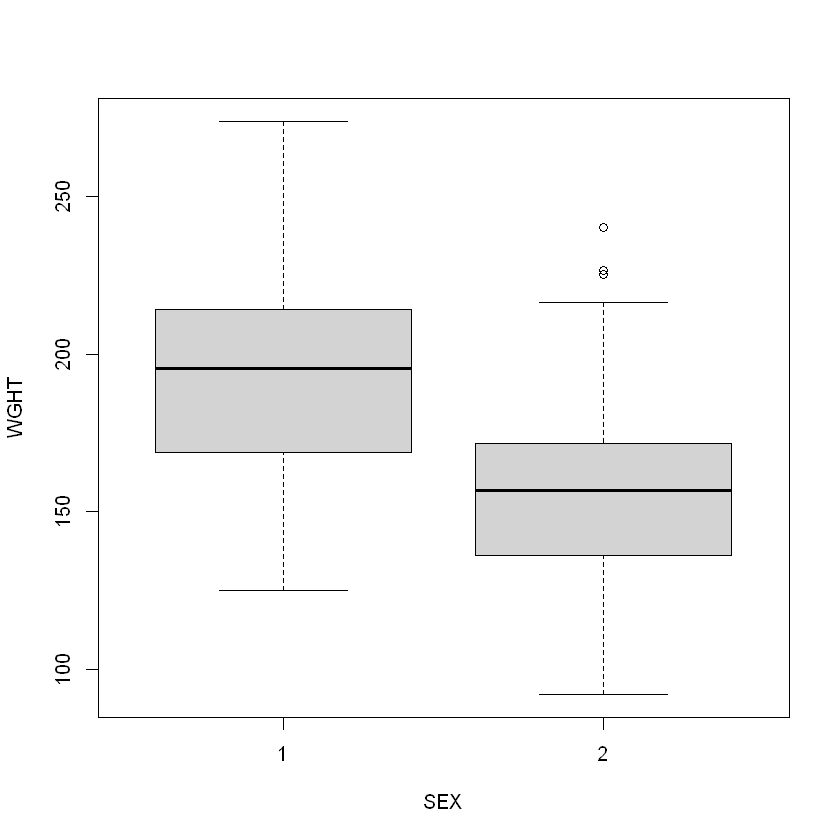

In [26]:
kruskal.test(WGHT ~ SEX, data=clinical_data)
boxplot(WGHT ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  WGHT by COHORT
Kruskal-Wallis chi-squared = 4.1733, df = 1, p-value = 0.04107


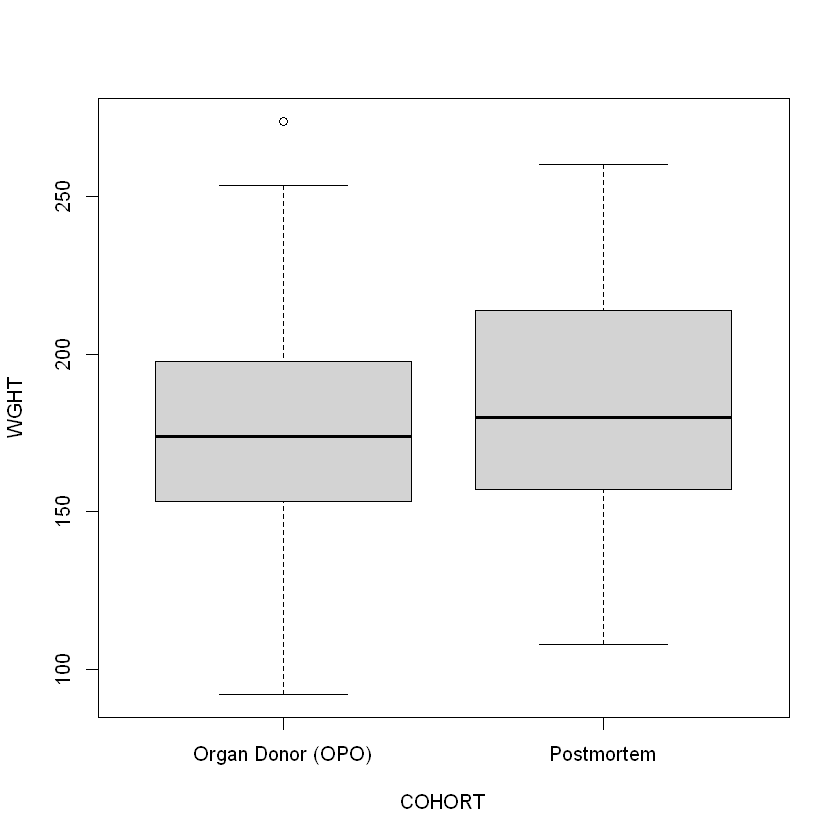

In [27]:
kruskal.test(WGHT ~ COHORT, data=clinical_data)
boxplot(WGHT ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  WGHT by DTHHRDY
Kruskal-Wallis chi-squared = 6.6293, df = 4, p-value = 0.1568


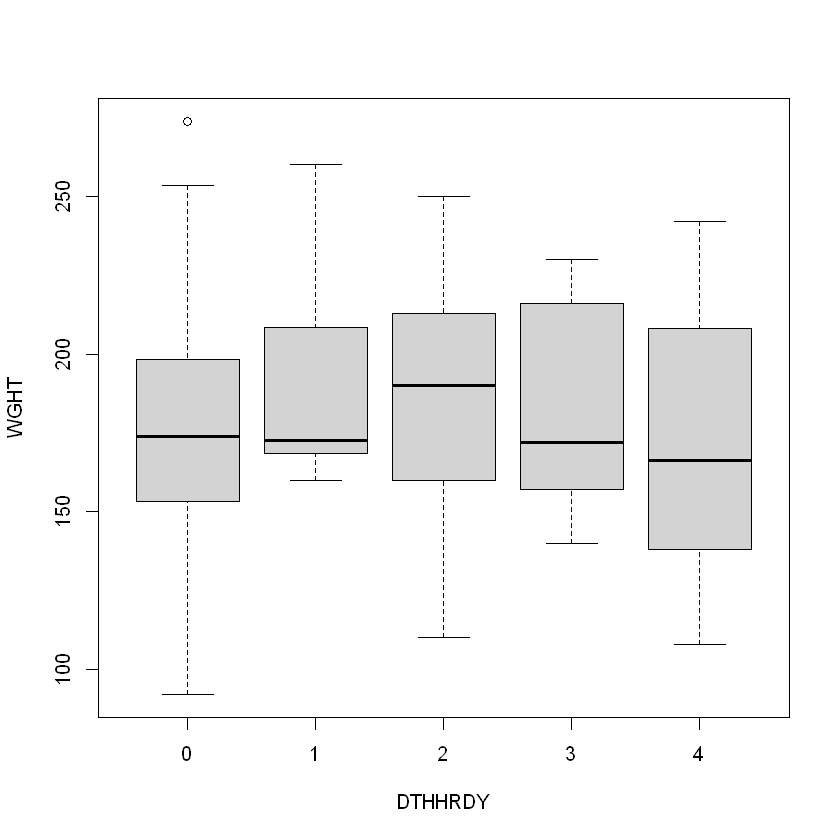

In [28]:
kruskal.test(WGHT ~ DTHHRDY, data=clinical_data)
boxplot(WGHT ~ DTHHRDY, data=clinical_data)

### 1.3.2.3 BMI


	Kruskal-Wallis rank sum test

data:  BMI by SEX
Kruskal-Wallis chi-squared = 1.089, df = 1, p-value = 0.2967


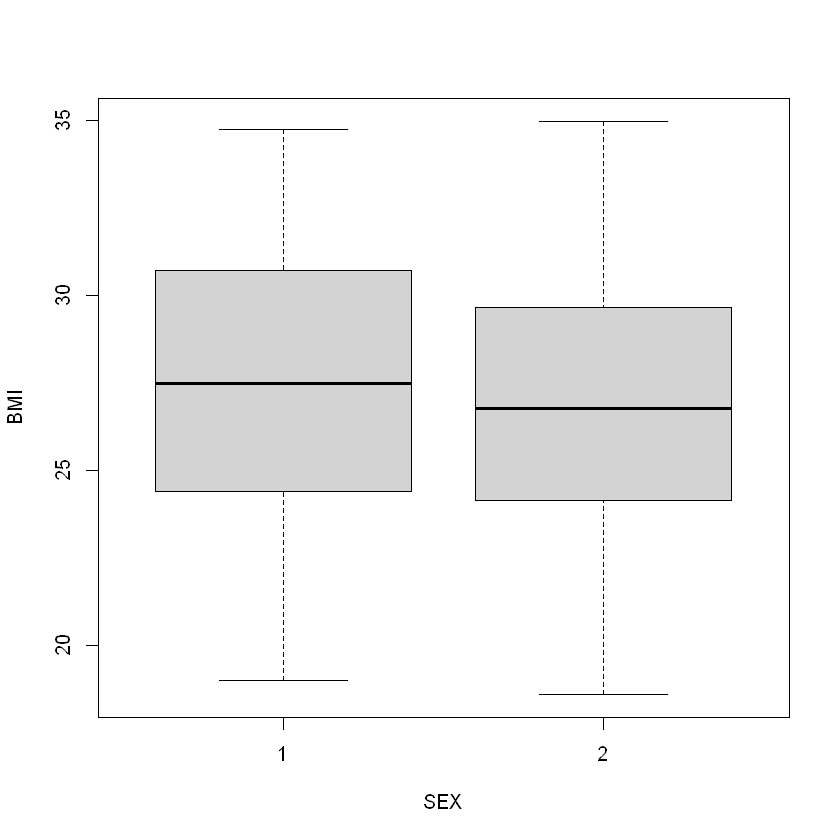

In [29]:
kruskal.test(BMI ~ SEX, data=clinical_data)
boxplot(BMI ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  BMI by COHORT
Kruskal-Wallis chi-squared = 0.30004, df = 1, p-value = 0.5839


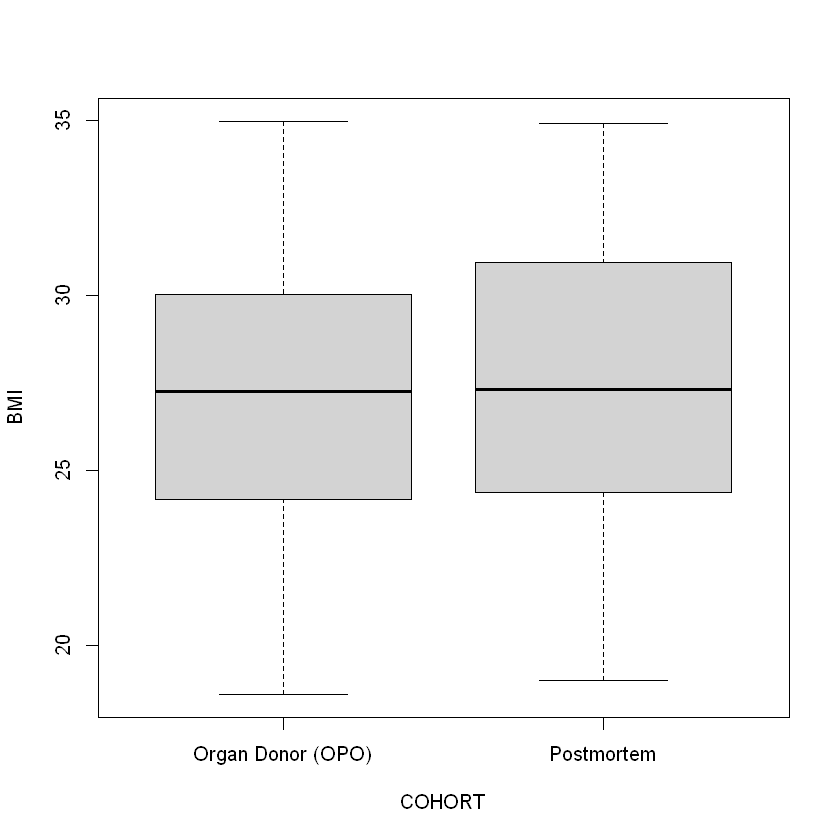

In [30]:
kruskal.test(BMI ~ COHORT, data=clinical_data)
boxplot(BMI ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  BMI by DTHHRDY
Kruskal-Wallis chi-squared = 0.085412, df = 4, p-value = 0.9991


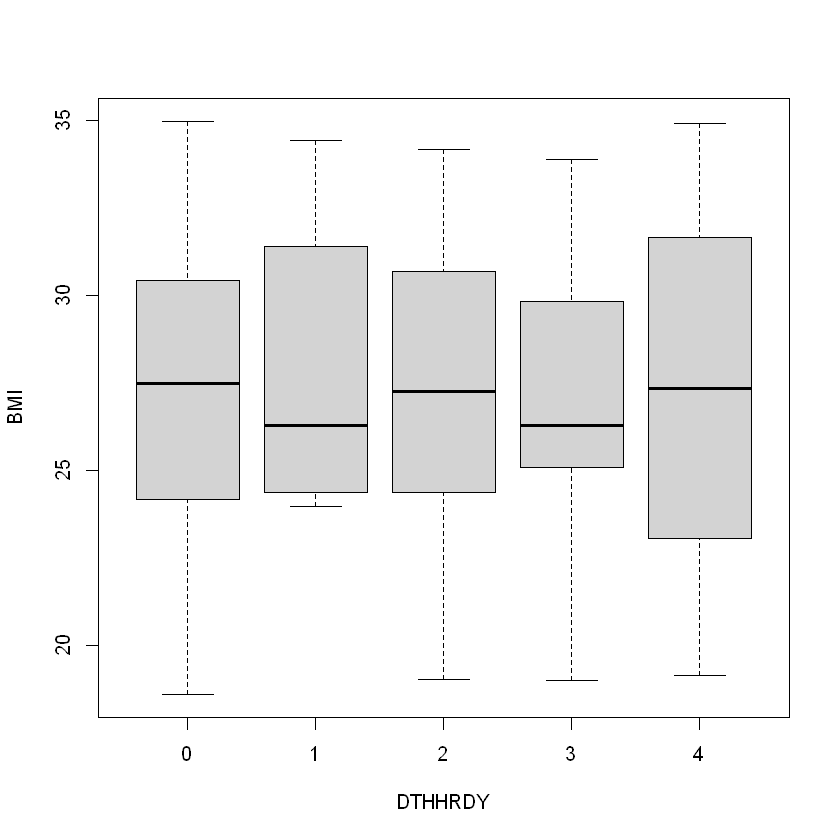

In [31]:
kruskal.test(BMI ~ DTHHRDY, data=clinical_data)
boxplot(BMI ~ DTHHRDY, data=clinical_data)

#### 1.3.2.3 TRISCHD


	Kruskal-Wallis rank sum test

data:  TRISCHD by SEX
Kruskal-Wallis chi-squared = 2.5489, df = 1, p-value = 0.1104


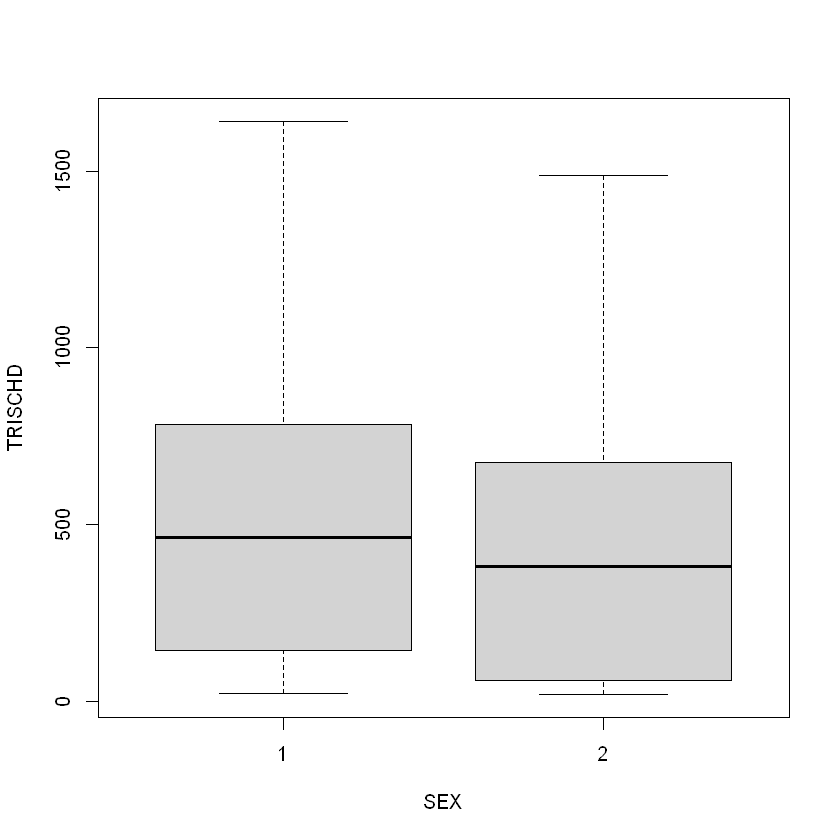

In [33]:
kruskal.test(TRISCHD ~ SEX, data=clinical_data)
boxplot(TRISCHD ~ SEX, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  TRISCHD by COHORT
Kruskal-Wallis chi-squared = 173.68, df = 1, p-value < 2.2e-16


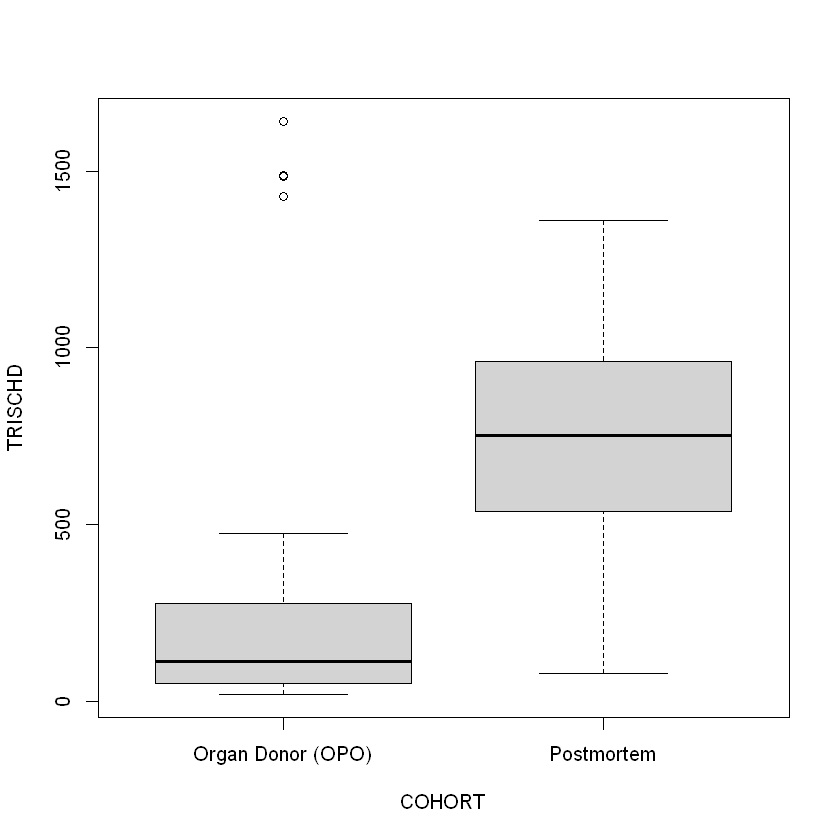

In [34]:
kruskal.test(TRISCHD ~ COHORT, data=clinical_data)
boxplot(TRISCHD ~ COHORT, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  TRISCHD by DTHHRDY
Kruskal-Wallis chi-squared = 176.5, df = 4, p-value < 2.2e-16


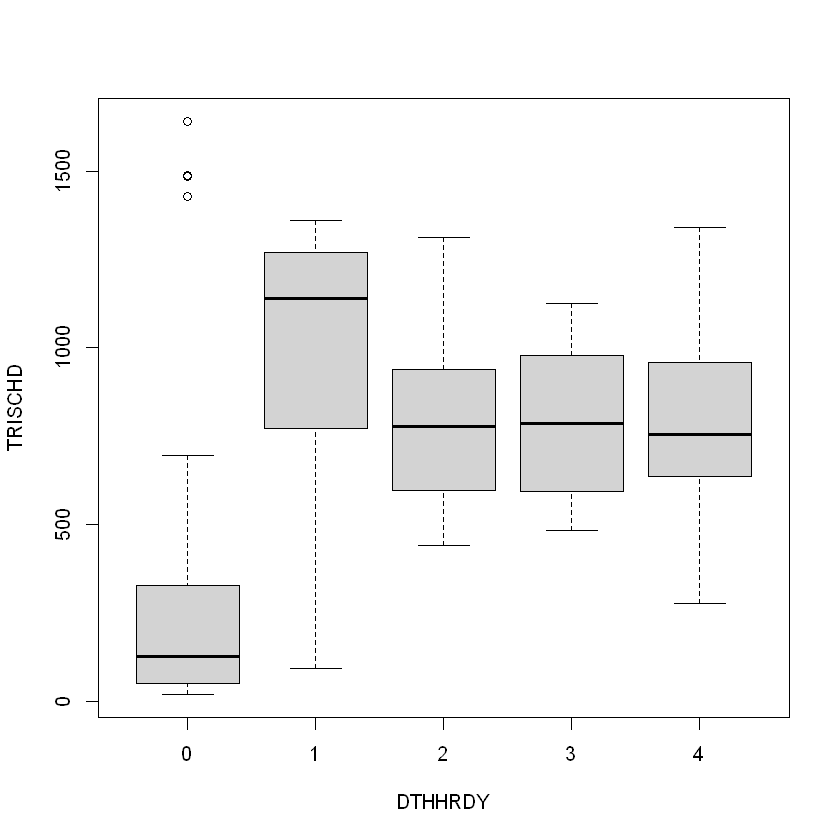

In [35]:
kruskal.test(TRISCHD ~ DTHHRDY, data=clinical_data)
boxplot(TRISCHD ~ DTHHRDY, data=clinical_data)

## 1.3.3 Correlations between categorical variables

4 categorical variables are SEX, COHORT, DTHHRDY and DTHVNT.

The idea is to perform a chi-squared test to see if two categorical variables are independant i.e they are "correlated to each other". They are 3 + 2 + 1 = 7 possible combinations to compare the categorical variables.

### 1.3.3.1 SEX

In [201]:
# Contingency table
cont_table <- table(clinical_data$SEX, clinical_data$COHORT)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
    Organ Donor (OPO) Postmortem
  1                88         92
  2                55         45


	Pearson's Chi-squared test with Yates' continuity correction

data:  cont_table
X-squared = 0.73176, df = 1, p-value = 0.3923


In [202]:
# Contingency table
cont_table <- table(clinical_data$SEX, clinical_data$DTHHRDY)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
     0  1  2  3  4
  1 96  3 60  9 12
  2 60  5 17  4 14

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 13.111, df = 4, p-value = 0.01075


In [203]:
# Contingency table
cont_table <- table(clinical_data$SEX, clinical_data$DTHVNT)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
      0   1  99
  1  77 101   2
  2  39  61   0

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 1.5981, df = 2, p-value = 0.4497


### 1.3.3.2 COHORT

In [207]:
# Contingency table
cont_table <- table(clinical_data$COHORT, clinical_data$DTHHRDY)
cont_table
# Chi-squared test
chisq.test(cont_table)

                   
                      0   1   2   3   4
  Organ Donor (OPO) 142   1   0   0   0
  Postmortem         14   7  77  13  26

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 225.5, df = 4, p-value < 2.2e-16


In [209]:
# Contingency table
cont_table <- table(clinical_data$COHORT, clinical_data$DTHVNT)
cont_table
# Chi-squared test
chisq.test(cont_table)

                   
                      0   1  99
  Organ Donor (OPO)   0 143   0
  Postmortem        116  19   2

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 212.88, df = 2, p-value < 2.2e-16


### 1.3.3.3 DTHHRDY

In [211]:
# Contingency table
cont_table <- table(clinical_data$DTHHRDY, clinical_data$DTHVNT)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
      0   1  99
  0   0 156   0
  1   7   1   0
  2  73   3   1
  3  11   2   0
  4  25   0   1

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 260.11, df = 8, p-value < 2.2e-16


# 1.4 Are there technical variables cofounding demographic/health variables ?

In [15]:
library(ggplot2)

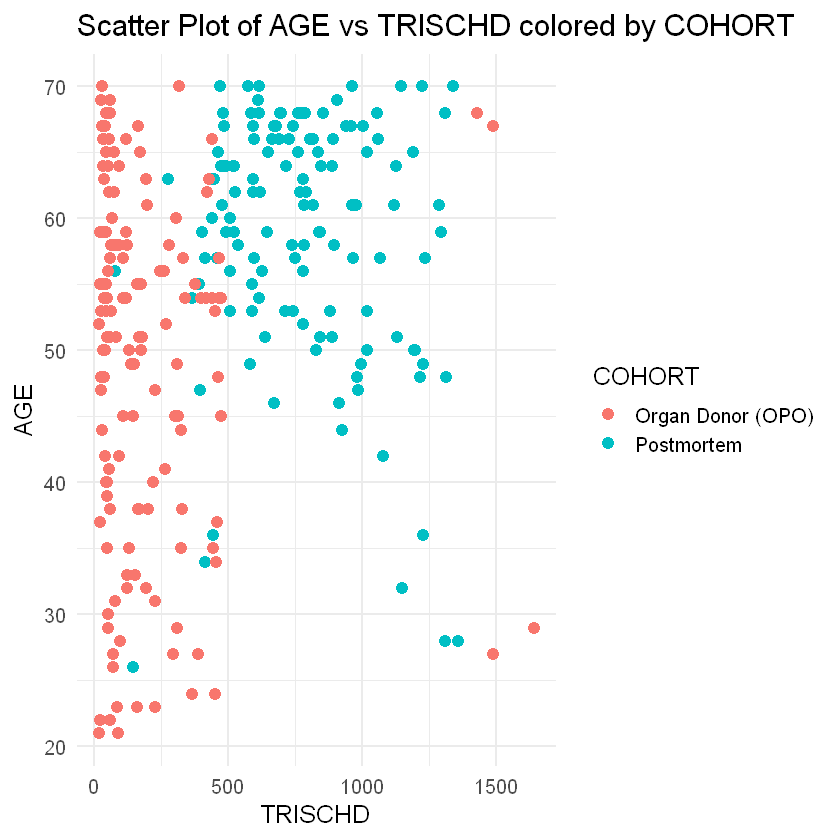

In [223]:
# Create the plot
ggplot(clinical_data, aes(x = TRISCHD, y = AGE, color = COHORT)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of AGE vs TRISCHD colored by COHORT",
       x = "TRISCHD",
       y = "AGE",
       color = "COHORT") +
  theme_minimal(15)

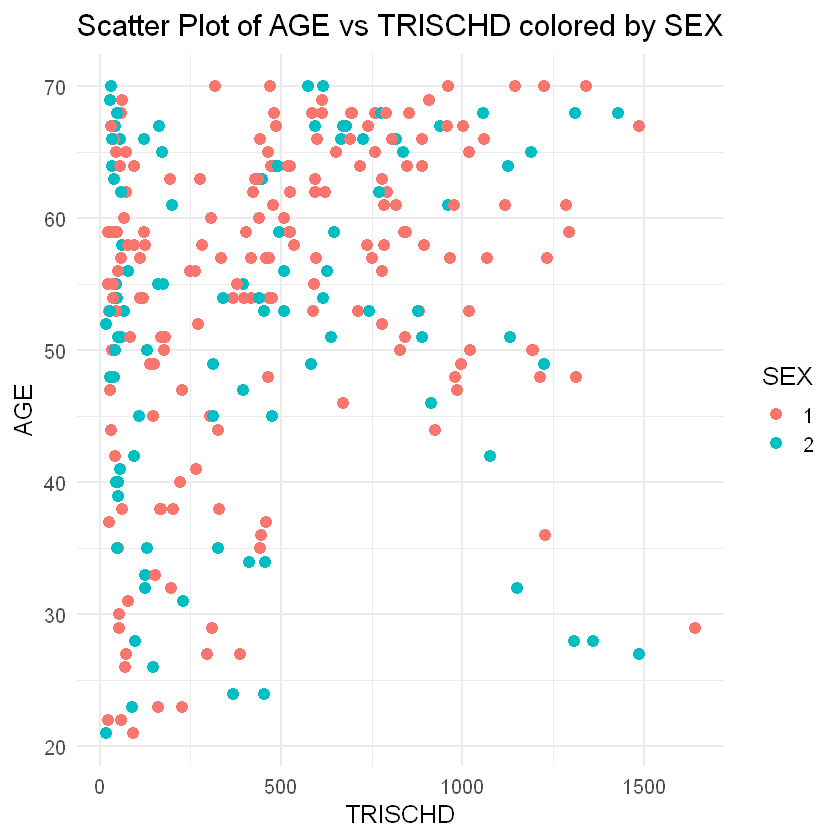

In [15]:
# Create the plot
ggplot(clinical_data, aes(x = TRISCHD, y = AGE, color = SEX)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of AGE vs TRISCHD colored by SEX",
       x = "TRISCHD",
       y = "AGE",
       color = "SEX") +
  theme_minimal(15)

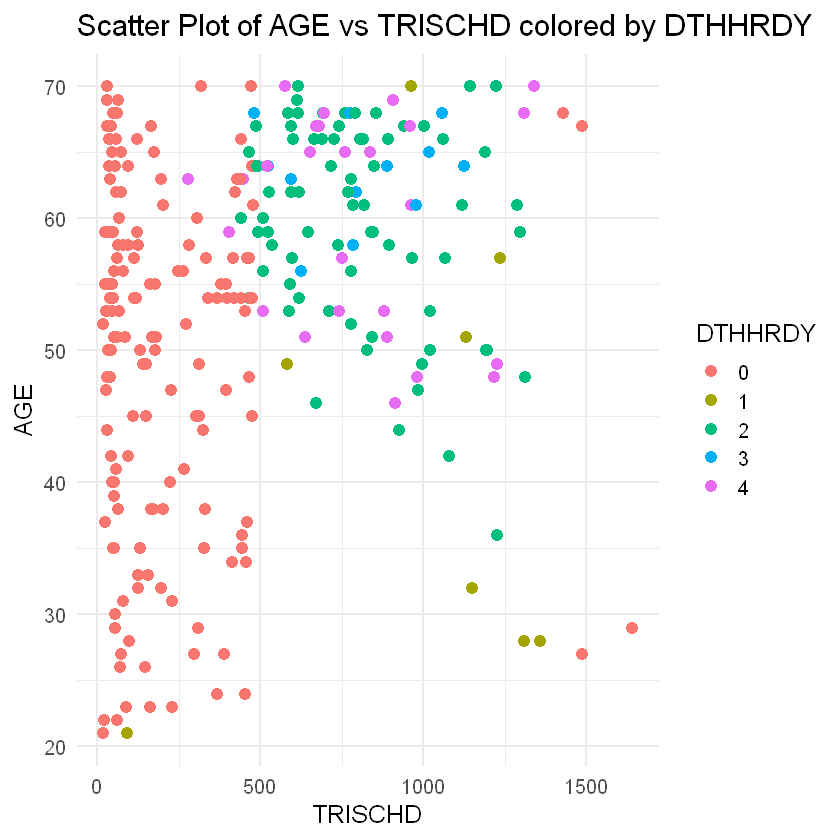

In [16]:
# Create the plot
ggplot(clinical_data, aes(x = TRISCHD, y = AGE, color = DTHHRDY)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of AGE vs TRISCHD colored by DTHHRDY",
       x = "TRISCHD",
       y = "AGE",
       color = "DTHHRDY") +
  theme_minimal(15)

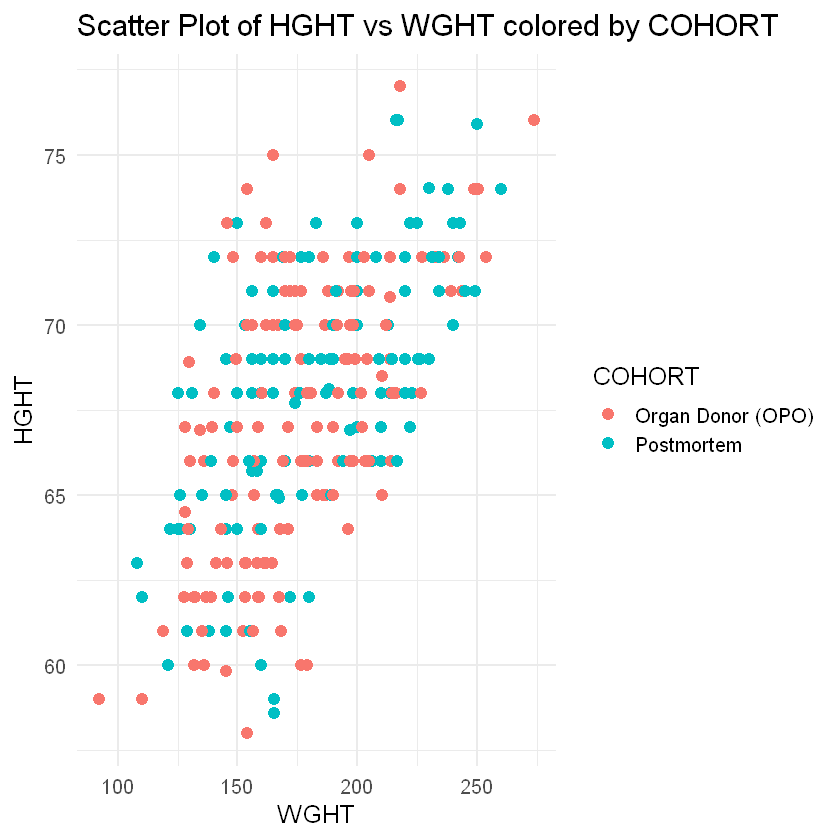

In [18]:
# Create the plot
ggplot(clinical_data, aes(x = WGHT, y = HGHT, color = COHORT)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of HGHT vs WGHT colored by COHORT",
       x = "WGHT",
       y = "HGHT",
       color = "COHORT") +
  theme_minimal(15)

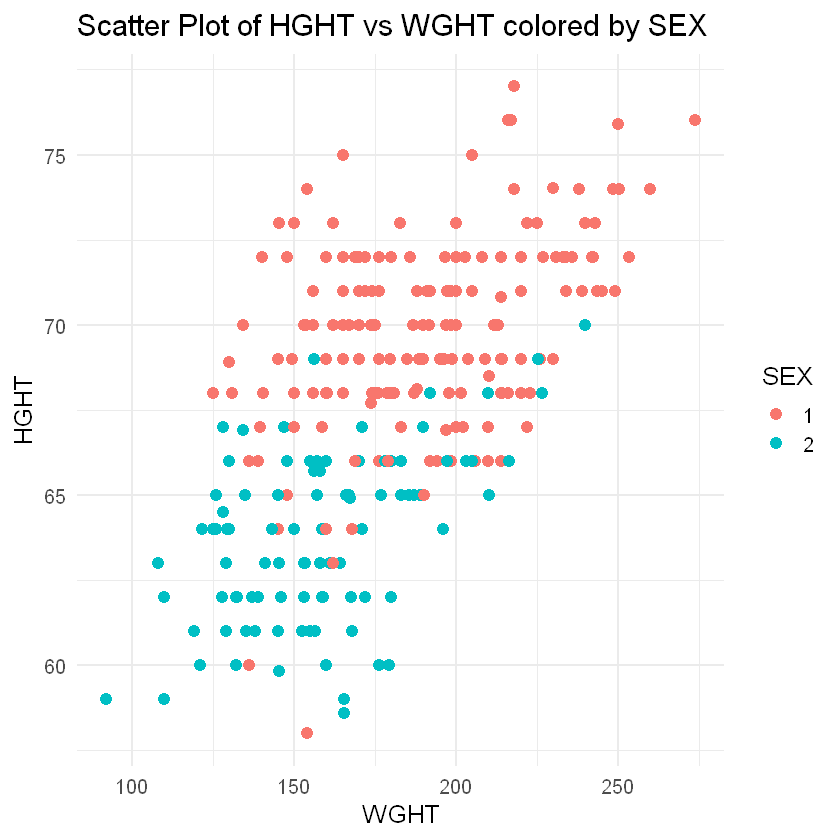

In [19]:
# Create the plot
ggplot(clinical_data, aes(x = WGHT, y = HGHT, color = SEX)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of HGHT vs WGHT colored by SEX",
       x = "WGHT",
       y = "HGHT",
       color = "SEX") +
  theme_minimal(15)

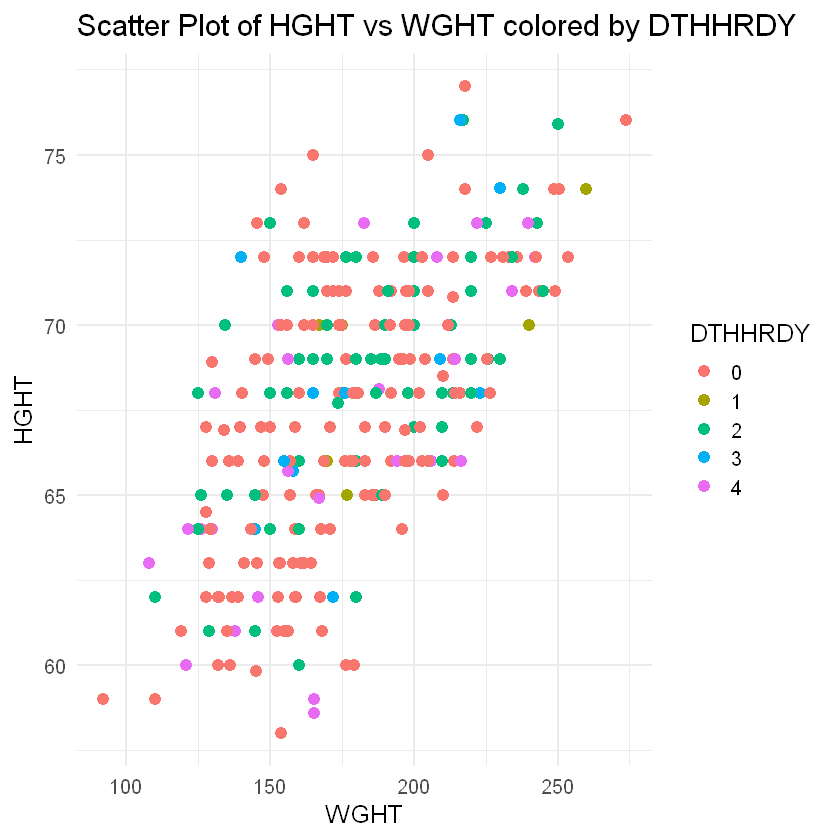

In [25]:
# Create the plot
ggplot(clinical_data, aes(x = WGHT, y = HGHT, color = DTHHRDY)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of HGHT vs WGHT colored by DTHHRDY ",
       x = "WGHT",
       y = "HGHT",
       color = "DTHHRDY ") +
  theme_minimal(15)

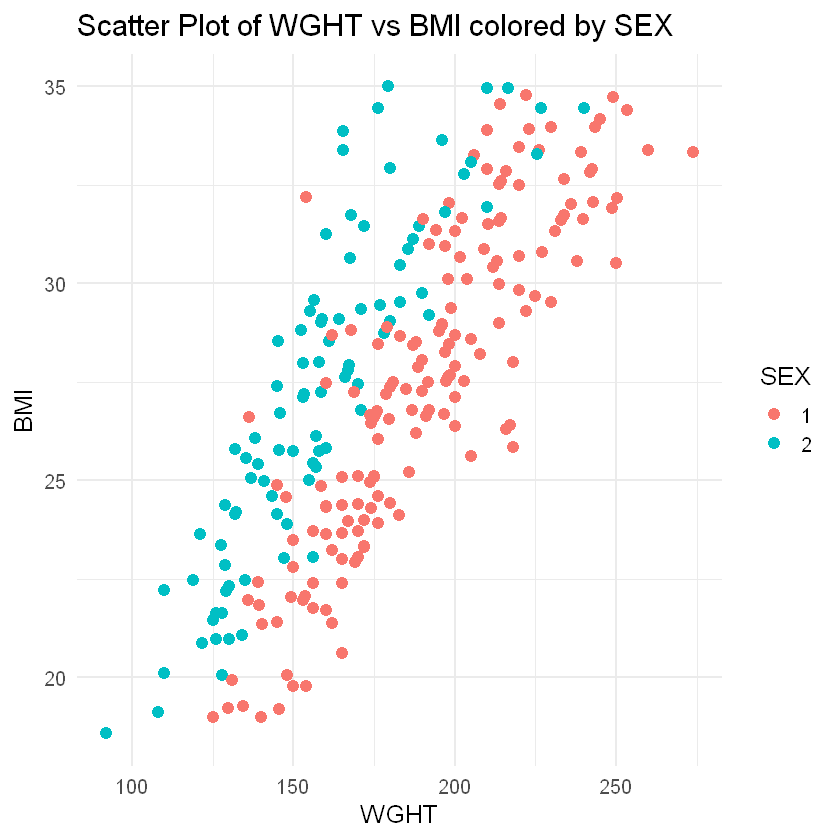

In [36]:
# Create the plot
ggplot(clinical_data, aes(x = WGHT, y = BMI, color = SEX)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of WGHT vs BMI colored by SEX ",
       x = "WGHT",
       y = "BMI",
       color = "SEX ") +
  theme_minimal(15)

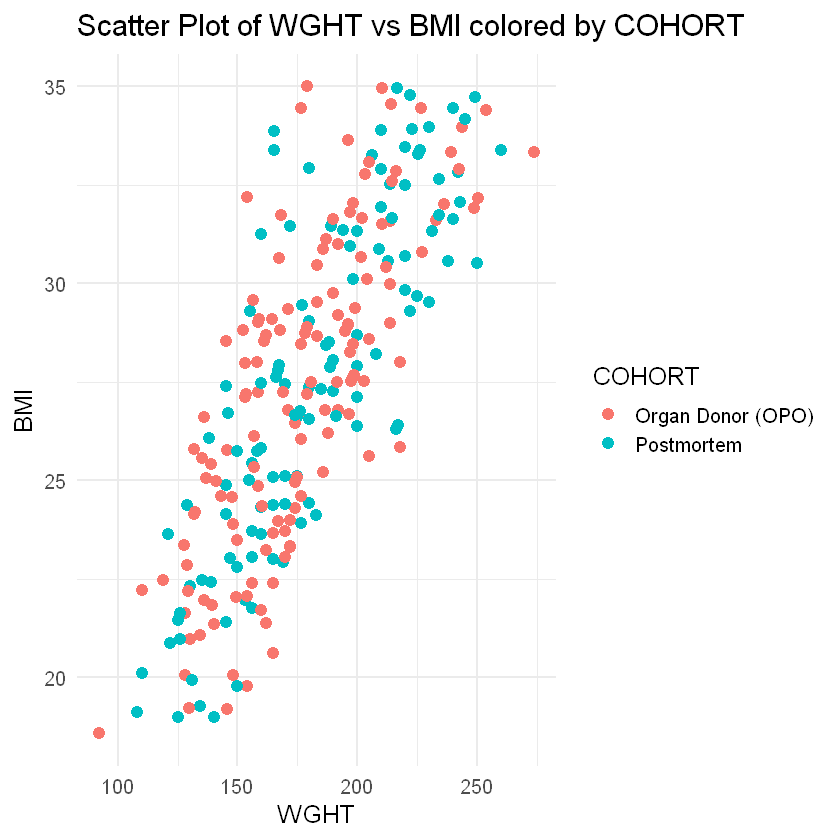

In [37]:
# Create the plot
ggplot(clinical_data, aes(x = WGHT, y = BMI, color = COHORT)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of WGHT vs BMI colored by COHORT ",
       x = "WGHT",
       y = "BMI",
       color = "COHORT ") +
  theme_minimal(15)

In [ ]:
# Create the plot
ggplot(clinical_data, aes(x = WGHT, y = BMI, color = COHORT)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of WGHT vs BMI colored by COHORT ",
       x = "WGHT",
       y = "BMI",
       color = "COHORT ") +
  theme_minimal(15)

# Q2 Clinical Data vs Morphology

## 2.1 Associations between clinical variables and morphological cluster counts

### 2.1.1 Import the morphological dataset

In [11]:
#load and format the morphological counts data

morpho_counts <- read.table("Aorta/morphological_counts_lunit_dino.tsv", 
                           sep = "\t", header=TRUE)

row.names(morpho_counts) <- morpho_counts$SMPLID
morpho_counts <- morpho_counts[-1]
head(morpho_counts,3)

,Mophological.cluster.G4_0,Mophological.cluster.G4_1,Mophological.cluster.G4_2,Mophological.cluster.G4_3,Mophological.cluster.G4_4,Mophological.cluster.G4_5,Mophological.cluster.G4_6,Mophological.cluster.G4_7,Mophological.cluster.G4_8,Mophological.cluster.G4_9,⋯,Mophological.cluster.G4_22,Mophological.cluster.G4_23,Mophological.cluster.G4_24,Mophological.cluster.G4_25,Mophological.cluster.G4_26,Mophological.cluster.G4_27,Mophological.cluster.G4_28,Mophological.cluster.G4_29,Mophological.cluster.G4_30,Mophological.cluster.G4_31
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX.111YS.0526,137,88,417,1,1,32,1,1,1,167,⋯,262,233,31,417,80,144,250,664,20,0
GTEX.1122O.1126,96,880,236,393,21,214,1,47,39,291,⋯,3350,99,190,495,278,774,694,268,145,0
GTEX.1128S.0326,2,552,211,1031,174,216,289,0,493,663,⋯,831,135,250,161,82,120,377,2,500,0


In [12]:
#transpose the morpholigical counts (samples as columns, clusters as rows) to have the compatible count format for DGE
morpho_counts2 <- t(morpho_counts)
head(morpho_counts2, 3)
dim(morpho_counts2)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
Mophological.cluster.G4_0,137,96,2,339,171,2,1,392,40,260,⋯,2,39,0,77,6,32,5,94,460,1
Mophological.cluster.G4_1,88,880,552,1,0,10,239,18,424,235,⋯,286,34,277,271,537,7,18,228,314,308
Mophological.cluster.G4_2,417,236,211,151,36,258,850,14,605,164,⋯,541,634,333,193,208,2,26,79,43,102


[1]  32 280

### 2.1.2 Compute the associations between clinical health variables and morphological cluster counts

The 5 demographics/health variables are AGE, SEX, HGHT, WGHT and BMI. The 3 technical variables are COHORT, TRISCHD, DTHHRDY.


We will treat the 5 demographic/health variables in this part and the 3 technicals variables in the next section.

The goal of this section is to compare the magnitude of the associations of the different clinical variables with morphology. For that, we will perform differential morphological cluster expression with DESeq2 and edgeR.

To use differential expression package like edgeR and deseq2, we need to have at least 2 conditions. We decided to take arbitrarly the median of the quantiative variables so that we can separate it into 2 groups.

In [13]:
# Create the different groups for differential expression with the medians.
age_group <- factor(ifelse(clinical_data$AGE < median(clinical_data$AGE), "young", "old"))
height_group <- factor(ifelse(clinical_data$HGHT < median(clinical_data$HGHT), "tall", "short"))
weight_group <- factor(ifelse(clinical_data$WGHT < median(clinical_data$WGHT), "skinny", "heavy"))
BMI_group <- factor(ifelse(clinical_data$BMI < median(clinical_data$BMI), "low_BMI", "high_BMI"))

#### 2.1.2.1 DGE for AGE 

In [236]:
# create the differential expression data structure used by edgeR (DGElist)
DGE_list <- DGEList(morpho_counts2, group = age_group)
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]

# normalize the data
DGE_list <- calcNormFactors(DGE_list)
DGE_list <- normLibSizes(DGE_list)

# create a design matrix
design <- model.matrix(~age_group + clinical_data$COHORT + clinical_data$DTHHRDY + clinical_data$TRISCHD)

# estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

# fit the model and test for differential expression
fit <- glmQLFit(DGE_list,design)
qlf <- glmQLFTest(fit,coef=2)

# get the differential expression table
topTags(qlf,n = 10)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mophological.cluster.G4_26,1.1130848,15.76839,27.143933,3.699227e-07,1.109768e-05
Mophological.cluster.G4_15,0.7282146,15.21104,17.648582,3.589578e-05,5.384367e-04
Mophological.cluster.G4_11,1.1751396,15.25212,14.940323,1.383788e-04,1.383788e-03
Mophological.cluster.G4_29,-1.0655988,14.66163,13.212679,3.315520e-04,2.486640e-03
Mophological.cluster.G4_12,-1.3023593,14.09729,12.381258,5.069361e-04,3.041617e-03
Mophological.cluster.G4_27,-0.7713467,15.31012,10.383706,1.423640e-03,7.118201e-03
Mophological.cluster.G4_8,-0.8275362,15.52733,9.395551,2.390415e-03,1.024464e-02
Mophological.cluster.G4_14,0.7239539,15.24767,5.788229,1.679111e-02,6.296667e-02
Mophological.cluster.G4_22,-0.5806257,15.54334,5.132796,2.425218e-02,8.084059e-02


Warning message:
"Removed 15 rows containing missing values or values outside the scale range (`geom_text_repel()`)."


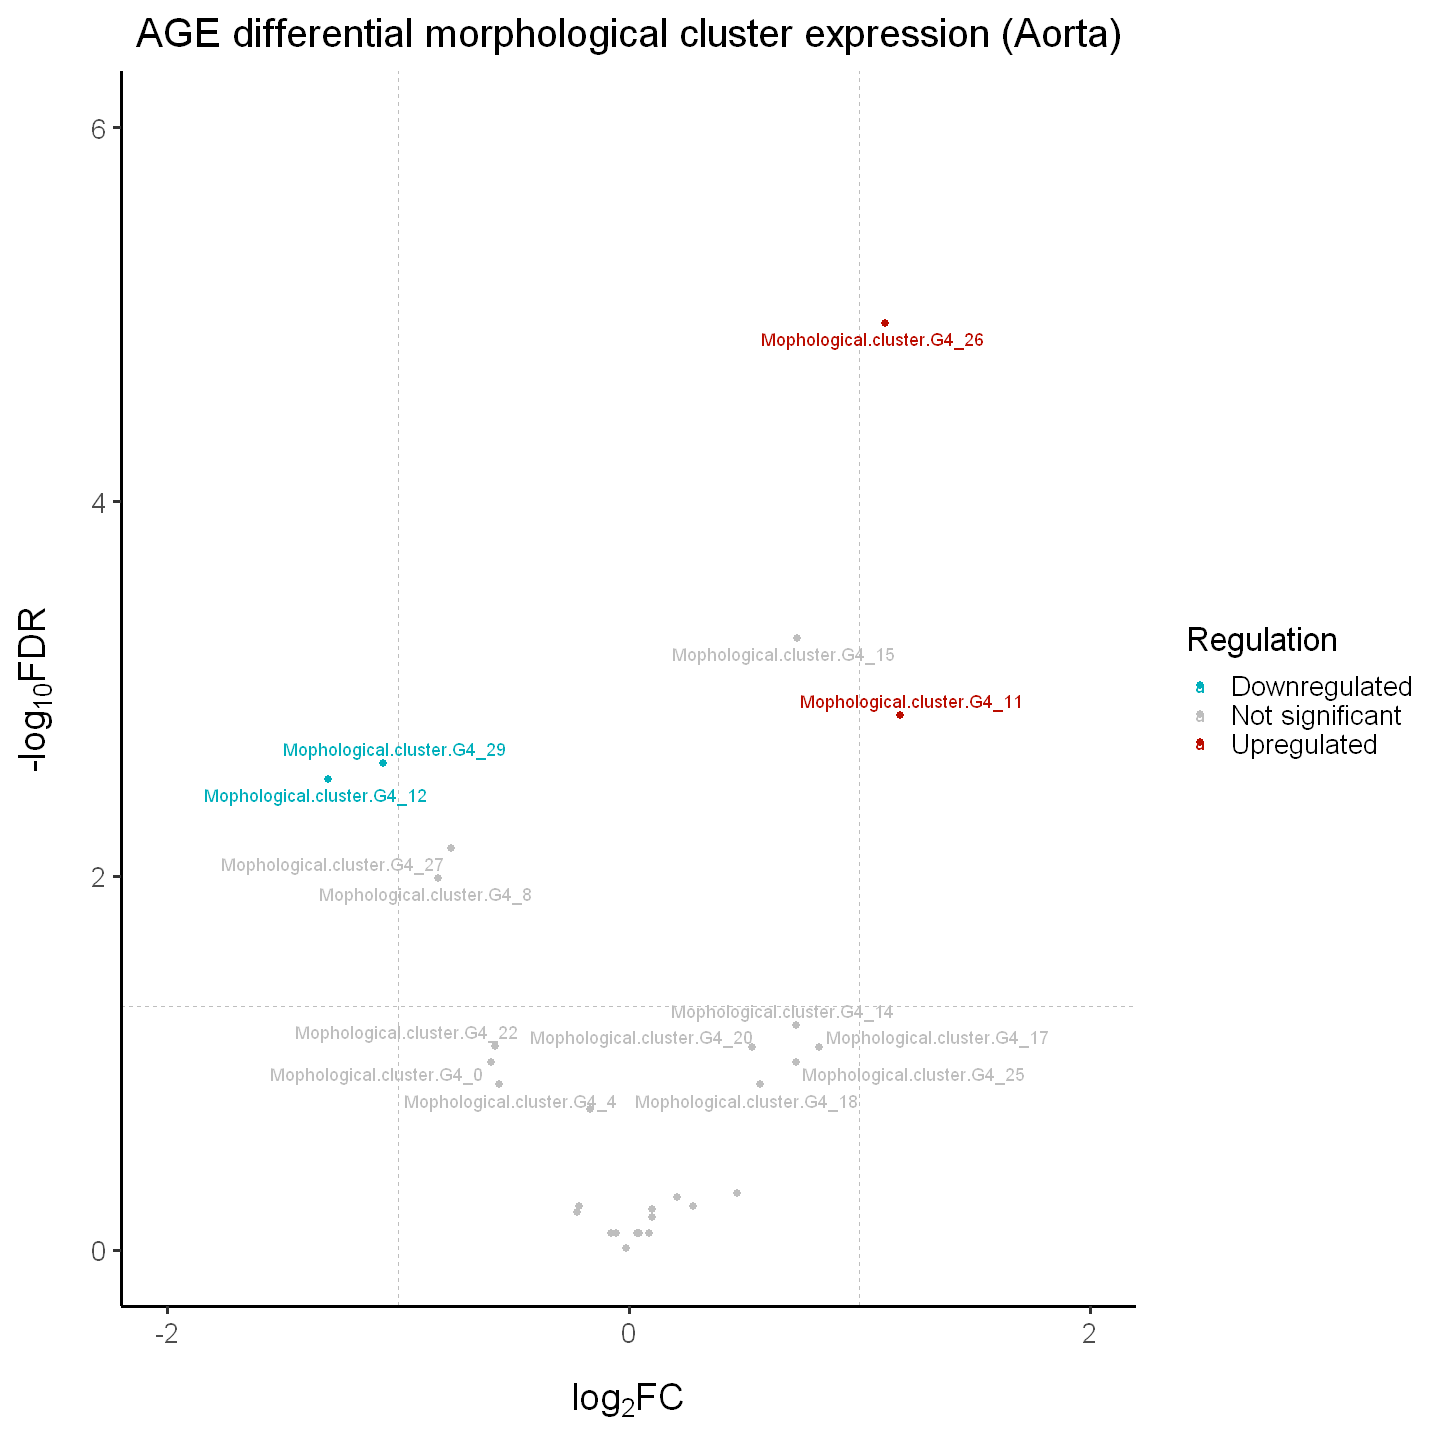

In [237]:
##### AGE volcanoplot
d_topTags <- topTags(qlf, n = 32)[["table"]]
# Biostatsquid theme
theme_set(theme_classic(base_size = 20) +
            theme(
              axis.title.y = element_text(face = "bold", margin = margin(0,20,0,0), size = rel(1.1), color = 'black'),
              axis.title.x = element_text(hjust = 0.5, face = "bold", margin = margin(20,0,0,0), size = rel(1.1), color = 'black'),
              plot.title = element_text(hjust = 0.5)
            ))
# Add a column to the data frame to specify if they are UP- or DOWN- regulated 
d_topTags$diffexpressed <- "NO"  # add a column diffexpressed with only NO  
# if log2Foldchange > 1 and FDR < 0.05, set as "UP"  
d_topTags$diffexpressed[d_topTags$logFC > 1 & d_topTags$FDR < 0.05] <- "UP"
# if log2Foldchange < -1 and FDR < 0.05, set as "DOWN"
d_topTags$diffexpressed[d_topTags$logFC < -1 & d_topTags$FDR < 0.05] <- "DOWN"

# Create a new column "delabel" to de, that will contain the name of the top 15 differentially expressed genes (NA in case they are not)
data_test<- d_topTags
names <- rownames(d_topTags)
d_topTags <- cbind(names,d_topTags)
d_topTags$delabel <- ifelse(d_topTags$names %in% head(d_topTags[order(d_topTags$FDR), "names"], 15), d_topTags$names, NA)

# Set plot size: width and height in inches
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = d_topTags, aes(x = logFC, y = -log10(FDR), col = diffexpressed, label = delabel)) +
  geom_vline(xintercept = c(-1, 1), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') + 
  geom_point(size = 2) + 
  scale_color_manual(values = c("#00AFBB", "grey", "#bb0c00"), # to set the colours of our variable  
                     labels = c("Downregulated", "Not significant", "Upregulated")) + 
  coord_cartesian(ylim = c(0, 6), xlim = c(-2, 2)) + # set the limits of the axes
  labs(color = 'Regulation', #legend_title, 
       x = expression("log"[2]*"FC"), y = expression("-log"[10]*"FDR")) + 
  scale_x_continuous(breaks = seq(-10, 10, 2)) + # to customise the breaks in the x axis
  ggtitle('AGE differential morphological cluster expression (Aorta)') +
  geom_text_repel(max.overlaps = Inf) # To show all labels

#### 2.1.2.2 DGE for SEX 

In [251]:
# create the differential expression data structure used by edgeR (DGElist)
DGE_list <- DGEList(morpho_counts2, group = clinical_data$SEX)
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]

# normalize the data
DGE_list <- calcNormFactors(DGE_list)
DGE_list <- normLibSizes(DGE_list)

# create a design matrix
design <- model.matrix(~clinical_data$SEX)
# estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

# fit the model and test for differential expression
fit <- glmQLFit(DGE_list,design)
qlf <- glmQLFTest(fit,coef=2)

# get the differential expression table
topTags(qlf,n = 32)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mophological.cluster.G4_3,1.144356672,15.49945,17.794822627,3.319319e-05,0.001028989
Mophological.cluster.G4_4,-0.922847547,15.03353,8.034045729,4.922344e-03,0.076296324
Mophological.cluster.G4_7,-0.906175728,12.45333,5.095458734,2.475352e-02,0.255786405
Mophological.cluster.G4_26,0.385493058,15.73628,3.852083978,5.066701e-02,0.386477907
Mophological.cluster.G4_29,-0.555900545,14.70323,3.216683890,7.396234e-02,0.386477907
Mophological.cluster.G4_9,0.244218901,15.02450,3.073770001,8.065111e-02,0.386477907
Mophological.cluster.G4_21,-0.355697068,12.35601,2.944485787,8.726920e-02,0.386477907
Mophological.cluster.G4_12,-0.577080636,14.26207,2.254055499,1.343834e-01,0.520735699
Mophological.cluster.G4_13,-0.422683836,15.18659,1.720421420,1.907055e-01,0.601609520


Warning message:
"Removed 16 rows containing missing values or values outside the scale range (`geom_text_repel()`)."


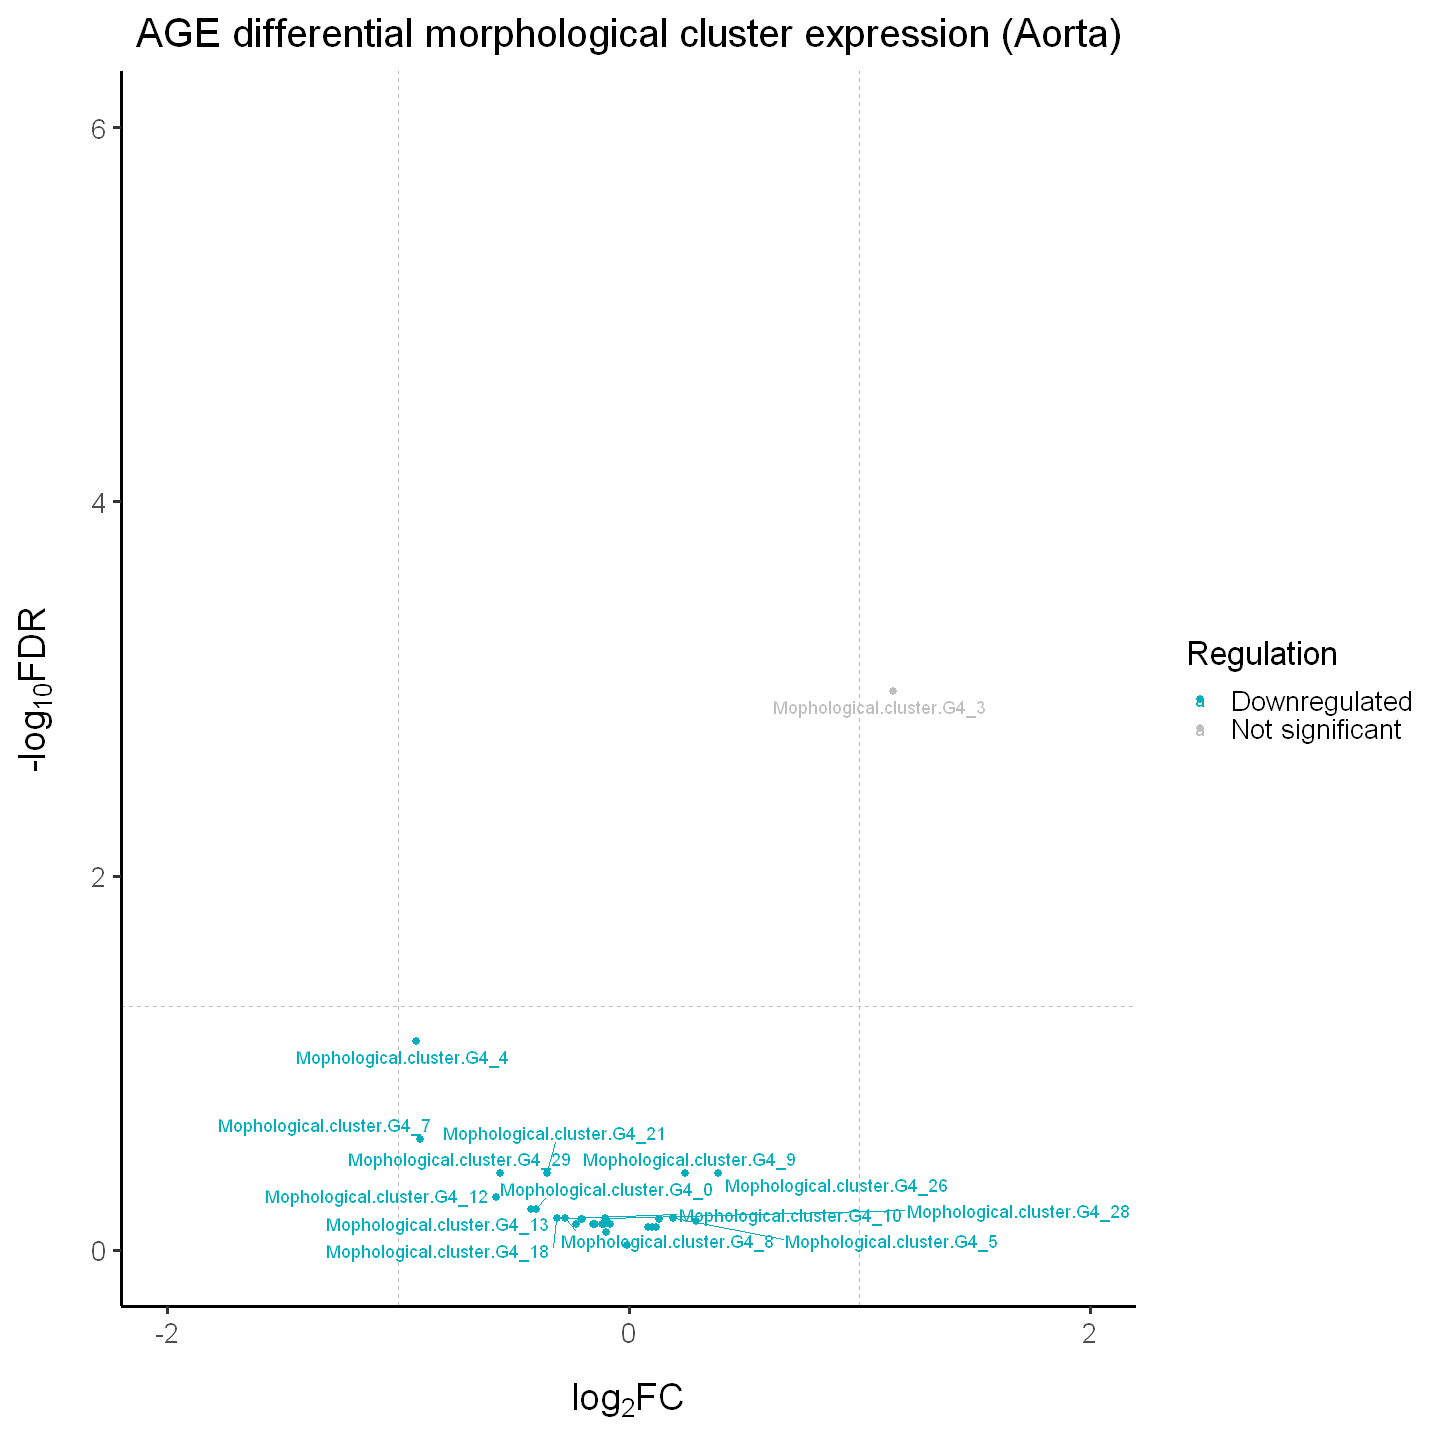

In [253]:
##### SEX volcanoplot
d_topTags <- topTags(qlf, n = 32)[["table"]]
# Biostatsquid theme
theme_set(theme_classic(base_size = 20) +
            theme(
              axis.title.y = element_text(face = "bold", margin = margin(0,20,0,0), size = rel(1.1), color = 'black'),
              axis.title.x = element_text(hjust = 0.5, face = "bold", margin = margin(20,0,0,0), size = rel(1.1), color = 'black'),
              plot.title = element_text(hjust = 0.5)
            ))
# Add a column to the data frame to specify if they are UP- or DOWN- regulated 
d_topTags$diffexpressed <- "NO"  # add a column diffexpressed with only NO  
# if log2Foldchange > 1 and FDR < 0.05, set as "UP"  
d_topTags$diffexpressed[d_topTags$logFC > 1 & d_topTags$FDR < 0.05] <- "UP"
# if log2Foldchange < -1 and FDR < 0.05, set as "DOWN"
d_topTags$diffexpressed[d_topTags$logFC < -1 & d_topTags$FDR < 0.05] <- "DOWN"

# Create a new column "delabel" to de, that will contain the name of the top 15 differentially expressed genes (NA in case they are not)
data_test<- d_topTags
names <- rownames(d_topTags)
d_topTags <- cbind(names,d_topTags)
d_topTags$delabel <- ifelse(d_topTags$names %in% head(d_topTags[order(d_topTags$FDR), "names"], 15), d_topTags$names, NA)
# Set plot size: width and height in inches
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = d_topTags, aes(x = logFC, y = -log10(FDR), col = diffexpressed, label = delabel)) +
  geom_vline(xintercept = c(-1, 1), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') + 
  geom_point(size = 2) + 
  scale_color_manual(values = c("#00AFBB", "grey", "#bb0c00"), # to set the colours of our variable  
                     labels = c("Downregulated", "Not significant", "Upregulated")) + 
  coord_cartesian(ylim = c(0, 6), xlim = c(-2, 2)) + # set the limits of the axes
  labs(color = 'Regulation', #legend_title, 
       x = expression("log"[2]*"FC"), y = expression("-log"[10]*"FDR")) + 
  scale_x_continuous(breaks = seq(-10, 10, 2)) + # to customise the breaks in the x axis
  ggtitle('AGE differential morphological cluster expression (Aorta)') +
  geom_text_repel(max.overlaps = Inf) # To show all labels

In [199]:
TRISCHD_group <- factor(ifelse(clinical_data$TRISCHD < median(clinical_data$TRISCHD), "low_TRISCHD", "high_TRISCHD"))

#### 2.1.2.3 DGE for HGHT 

In [245]:
# create the differential expression data structure used by edgeR (DGElist)
DGE_list <- DGEList(morpho_counts2, group = height_group)
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]

# normalize the data
DGE_list <- calcNormFactors(DGE_list)
DGE_list <- normLibSizes(DGE_list)

# create a design matrix
design <- model.matrix(~height_group + clinical_data$WGHT + clinical_data$TRISCHD + clinical_data$SEX + clinical_data$TRISCHD + clinical_data$DTHHRDY)

# estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

# fit the model and test for differential expression
fit <- glmQLFit(DGE_list,design)
qlf <- glmQLFTest(fit,coef=2)

# get the differential expression table
topTags(qlf,n = 10)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mophological.cluster.G4_5,0.5563470,15.22492,3.3820012,0.06698977,0.9649157
Mophological.cluster.G4_20,0.3897738,15.27135,1.4839912,0.22419492,0.9649157
Mophological.cluster.G4_26,0.3264946,15.73628,1.4278867,0.23313889,0.9649157
Mophological.cluster.G4_29,-0.5470664,14.70322,1.3973980,0.23818057,0.9649157
Mophological.cluster.G4_7,-0.7993153,12.45336,1.3329585,0.24928159,0.9649157
Mophological.cluster.G4_8,-0.4273356,15.52698,0.9957156,0.31922640,0.9649157
Mophological.cluster.G4_28,-0.1206014,15.45268,0.8492426,0.35757423,0.9649157
Mophological.cluster.G4_17,-0.5243392,12.56524,0.7187340,0.39729655,0.9649157
Mophological.cluster.G4_2,-0.2763373,15.00128,0.6387608,0.42484946,0.9649157


#### 2.1.2.4 DGE for WGHT 

In [247]:
# create the differential expression data structure used by edgeR (DGElist)
DGE_list <- DGEList(morpho_counts2, group = weight_group)
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]

# normalize the data
DGE_list <- calcNormFactors(DGE_list)
DGE_list <- normLibSizes(DGE_list)

# create a design matrix
design <- model.matrix(~weight_group + clinical_data$HGHT + clinical_data$BMI + clinical_data$TRISCHD + clinical_data$SEX + clinical_data$COHORT)

# estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

# fit the model and test for differential expression
fit <- glmQLFit(DGE_list,design)
qlf <- glmQLFTest(fit,coef=2)

# get the differential expression table
topTags(qlf,n = 10)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mophological.cluster.G4_11,-1.5971664,15.25212,13.0630610,0.0003575939,0.01072782
Mophological.cluster.G4_30,0.5433053,14.42957,3.8338489,0.0512303878,0.74778029
Mophological.cluster.G4_17,0.9745157,12.68445,2.2094953,0.1382999996,0.74778029
Mophological.cluster.G4_12,0.9022298,14.09728,1.8839479,0.1709955936,0.74778029
Mophological.cluster.G4_9,0.3123816,15.07935,1.7548835,0.1863550002,0.74778029
Mophological.cluster.G4_16,-0.1365022,15.31748,1.2954203,0.2560341808,0.74778029
Mophological.cluster.G4_24,-0.4237073,15.82863,1.2155810,0.2711859105,0.74778029
Mophological.cluster.G4_23,0.2743157,14.63494,1.1797811,0.2783441778,0.74778029
Mophological.cluster.G4_26,-0.3453408,15.76839,1.1056608,0.2939429187,0.74778029


#### 2.1.2.5 DGE for BMI 

In [248]:
# create the differential expression data structure used by edgeR (DGElist)
DGE_list <- DGEList(morpho_counts2, group = BMI_group)
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]

# normalize the data
DGE_list <- calcNormFactors(DGE_list)
DGE_list <- normLibSizes(DGE_list)

# create a design matrix
design <- model.matrix(~BMI_group + clinical_data$WGHT)

# estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

# fit the model and test for differential expression
fit <- glmQLFit(DGE_list,design)
qlf <- glmQLFTest(fit,coef=2)

# get the differential expression table
topTags(qlf,n = 10)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mophological.cluster.G4_17,1.1864354,12.68453,6.7386138,0.009930498,0.2979149
Mophological.cluster.G4_18,0.9425745,14.50864,4.8569601,0.028345288,0.4251793
Mophological.cluster.G4_2,0.4880227,15.08498,2.8578490,0.092037255,0.8709126
Mophological.cluster.G4_29,0.5866119,14.66163,2.1007729,0.148339136,0.8709126
Mophological.cluster.G4_26,-0.3291641,15.76840,1.7497994,0.186976800,0.8709126
Mophological.cluster.G4_6,-0.5545880,13.76983,1.3514199,0.246015811,0.8709126
Mophological.cluster.G4_23,0.2075737,14.63494,1.2162612,0.271038691,0.8709126
Mophological.cluster.G4_20,-0.2637851,15.31747,0.9133371,0.340051508,0.8709126
Mophological.cluster.G4_5,-0.2364804,15.23060,0.8800154,0.349002597,0.8709126


### 2.1.3 Compute the associations between technical variables and morphological cluster counts

In [257]:
# create the differential expression data structure used by edgeR (DGElist)
DGE_list <- DGEList(morpho_counts2, group = clinical_data$COHORT)
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]

# normalize the data
DGE_list <- calcNormFactors(DGE_list)
DGE_list <- normLibSizes(DGE_list)

# create a design matrix
design <- model.matrix(~clinical_data$COHORT)

# estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

# fit the model and test for differential expression
fit <- glmQLFit(DGE_list,design)
qlf <- glmQLFTest(fit,coef=2)

# get the differential expression table
topTags(qlf,n = 32)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mophological.cluster.G4_28,-0.530987049,15.48876,3.379524e+01,1.653581e-08,2.618369e-07
Mophological.cluster.G4_18,1.654992542,14.50864,3.367730e+01,1.745579e-08,2.618369e-07
Mophological.cluster.G4_14,1.431838659,15.24767,3.062862e+01,7.138854e-08,7.138854e-07
Mophological.cluster.G4_1,-1.390385322,15.60145,2.819617e+01,2.224324e-07,1.668243e-06
Mophological.cluster.G4_30,0.811222003,14.42957,2.573890e+01,7.096961e-07,4.258177e-06
Mophological.cluster.G4_2,-1.073094984,15.08498,2.461767e+01,1.210140e-06,6.050701e-06
Mophological.cluster.G4_0,1.315591065,14.52264,2.257304e+01,3.225597e-06,1.382399e-05
Mophological.cluster.G4_9,-0.628016370,15.07935,2.080725e+01,7.581662e-06,2.843123e-05
Mophological.cluster.G4_4,1.314871452,14.96917,2.008645e+01,1.077061e-05,3.590202e-05


Warning message:
"Removed 15 rows containing missing values or values outside the scale range (`geom_text_repel()`)."


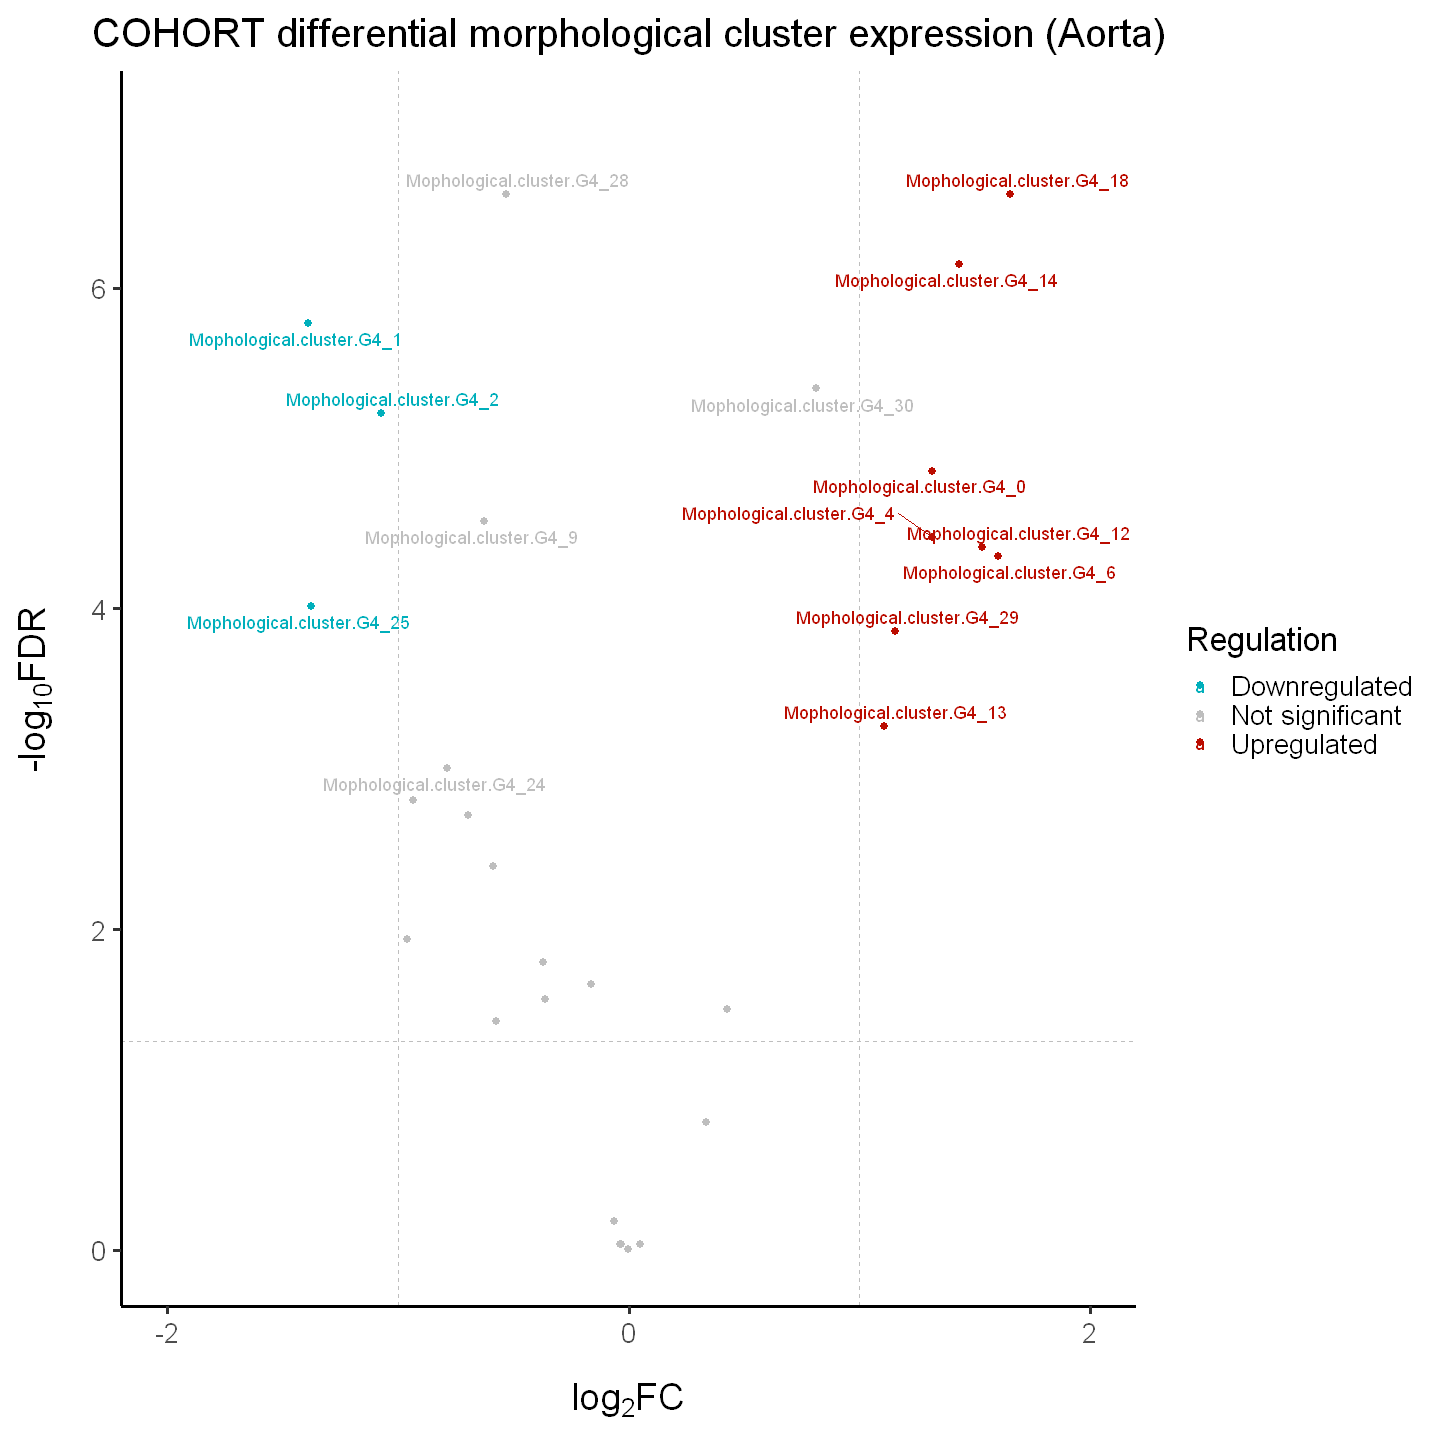

In [263]:
##### COHORT volcanoplot
d_topTags <- topTags(qlf, n = 32)[["table"]]
# Biostatsquid theme
theme_set(theme_classic(base_size = 20) +
            theme(
              axis.title.y = element_text(face = "bold", margin = margin(0,20,0,0), size = rel(1.1), color = 'black'),
              axis.title.x = element_text(hjust = 0.5, face = "bold", margin = margin(20,0,0,0), size = rel(1.1), color = 'black'),
              plot.title = element_text(hjust = 0.5)
            ))
# Add a column to the data frame to specify if they are UP- or DOWN- regulated 
d_topTags$diffexpressed <- "NO"  # add a column diffexpressed with only NO  
# if log2Foldchange > 1 and FDR < 0.05, set as "UP"  
d_topTags$diffexpressed[d_topTags$logFC > 1 & d_topTags$FDR < 0.05] <- "UP"
# if log2Foldchange < -1 and FDR < 0.05, set as "DOWN"
d_topTags$diffexpressed[d_topTags$logFC < -1 & d_topTags$FDR < 0.05] <- "DOWN"

# Create a new column "delabel" to de, that will contain the name of the top 15 differentially expressed genes (NA in case they are not)
data_test<- d_topTags
names <- rownames(d_topTags)
d_topTags <- cbind(names,d_topTags)
d_topTags$delabel <- ifelse(d_topTags$names %in% head(d_topTags[order(d_topTags$FDR), "names"], 15), d_topTags$names, NA)

# Set plot size: width and height in inches
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = d_topTags, aes(x = logFC, y = -log10(FDR), col = diffexpressed, label = delabel)) +
  geom_vline(xintercept = c(-1, 1), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') + 
  geom_point(size = 2) + 
  scale_color_manual(values = c("#00AFBB", "grey", "#bb0c00"), # to set the colours of our variable  
                     labels = c("Downregulated", "Not significant", "Upregulated")) + 
  coord_cartesian(ylim = c(0, 7), xlim = c(-2, 2)) + # set the limits of the axes
  labs(color = 'Regulation', #legend_title, 
       x = expression("log"[2]*"FC"), y = expression("-log"[10]*"FDR")) + 
  scale_x_continuous(breaks = seq(-10, 10, 2)) + # to customise the breaks in the x axis
  ggtitle('COHORT differential morphological cluster expression (Aorta)') +
  geom_text_repel(max.overlaps = Inf) # To show all labels

# Q3 Morphology vs gene expression

## 3.1 Import and explore the gene expression dataset

In [7]:
# Read the TSV file into a data frame
RNA_read_counts_init <- read.table("Aorta/RNA_read_counts.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(RNA_read_counts)
dim(RNA_read_counts_init)
head(RNA_read_counts_init)

[1] 56200   282

,Name,Description,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000223972.5,DDX11L1,0,0,0,0,0,5,0,0,⋯,1,0,0,3,0,0,0,0,0,1
2,ENSG00000227232.5,WASH7P,78,70,180,78,152,76,132,143,⋯,134,142,140,69,183,61,157,103,57,70
3,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
4,ENSG00000243485.5,MIR1302-2HG,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
5,ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,ENSG00000268020.3,OR4G4P,1,0,0,1,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
rownames(RNA_read_counts_init)<-RNA_read_counts_init$Name
RNA_read_counts<-as.matrix(RNA_read_counts_init[,-c(1,2)])
head(RNA_read_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
ENSG00000223972.5,0,0,0,0,0,5,0,0,0,0,⋯,1,0,0,3,0,0,0,0,0,1
ENSG00000227232.5,78,70,180,78,152,76,132,143,88,143,⋯,134,142,140,69,183,61,157,103,57,70
ENSG00000278267.1,0,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000243485.5,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
ENSG00000237613.2,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
ENSG00000268020.3,1,0,0,1,0,0,2,0,4,1,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
MAD<-numeric(nrow(RNA_read_counts))
for (i in 1:nrow(RNA_read_counts)){
    MAD[i]<-mad(RNA_read_counts[i,])
}
#Get the indices of the transcripts which are extremely little expressed
rows_to_remove<-which(MAD==0)
length(rows_to_remove)

[1] 28095

We have 28095 transcripts to remove out of the 56200 from our dataset i.e. almost half of it. 

In [10]:
# Remove the low expressed transcripts
RNA_read_counts <- RNA_read_counts[-rows_to_remove,]
dim(RNA_read_counts)

[1] 28105   280

In [16]:
head(morpho_counts)

,Mophological.cluster.G4_0,Mophological.cluster.G4_1,Mophological.cluster.G4_2,Mophological.cluster.G4_3,Mophological.cluster.G4_4,Mophological.cluster.G4_5,Mophological.cluster.G4_6,Mophological.cluster.G4_7,Mophological.cluster.G4_8,Mophological.cluster.G4_9,⋯,Mophological.cluster.G4_22,Mophological.cluster.G4_23,Mophological.cluster.G4_24,Mophological.cluster.G4_25,Mophological.cluster.G4_26,Mophological.cluster.G4_27,Mophological.cluster.G4_28,Mophological.cluster.G4_29,Mophological.cluster.G4_30,Mophological.cluster.G4_31
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX.111YS.0526,137,88,417,1,1,32,1,1,1,167,⋯,262,233,31,417,80,144,250,664,20,0
GTEX.1122O.1126,96,880,236,393,21,214,1,47,39,291,⋯,3350,99,190,495,278,774,694,268,145,0
GTEX.1128S.0326,2,552,211,1031,174,216,289,0,493,663,⋯,831,135,250,161,82,120,377,2,500,0
GTEX.117XS.0426,339,1,151,637,1844,473,260,3,440,153,⋯,148,166,43,49,158,211,184,142,277,3
GTEX.117YW.0226,171,0,36,791,1011,234,162,0,54,129,⋯,106,68,1,0,76,489,68,281,254,6
GTEX.11DXX.0426,2,10,258,1558,850,48,0,11,2491,325,⋯,8,89,952,0,26,197,323,5,70,0


In [57]:
# Create the different groups for differential expression with the medians.
morphoG4_0_group <- factor(ifelse(morpho_counts$Mophological.cluster.G4_0 < median(morpho_counts$Mophological.cluster.G4_0), "lowG4_0", "highG4_0"))

In [58]:
library(edgeR)
# create the differential expression data structure used by edgeR (DGElist)
DGE_list <- DGEList(RNA_read_counts, group = morphoG4_0_group)
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]

# normalize the data
DGE_list <- calcNormFactors(DGE_list)
DGE_list <- normLibSizes(DGE_list)

# create a design matrix
design <- model.matrix(~morphoG4_0_group)

# estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

# fit the model and test for differential expression
fit <- glmQLFit(DGE_list,design)
qlf <- glmQLFTest(fit,coef=2)

# get the differential expression table
topTags(qlf,n = 10)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000197616.11,4.180809,3.8937305,116.65597,5.549155e-23,1.136023e-18
ENSG00000198336.9,2.974091,1.3133505,97.64612,5.788050e-20,5.924648e-16
ENSG00000175206.10,3.051153,2.6593821,95.33490,1.380789e-19,9.422503e-16
ENSG00000106631.8,2.765707,2.1025360,94.27671,2.059734e-19,1.054172e-15
ENSG00000014257.15,-3.252222,1.2847019,91.65475,5.576527e-19,2.283253e-15
ENSG00000118194.18,2.938951,1.8051242,86.77277,3.632999e-18,1.239579e-14
ENSG00000134571.10,2.614086,1.3878590,84.94444,7.378688e-18,2.157950e-14
ENSG00000129991.12,2.835500,0.4929914,81.74587,2.571578e-17,6.580668e-14
ENSG00000148795.6,2.079141,1.8669781,79.67685,5.802522e-17,1.319880e-13


[1] 20472     8

[1] 47

[1] 76

Warning message:
"Removed 20457 rows containing missing values or values outside the scale range (`geom_text_repel()`)."


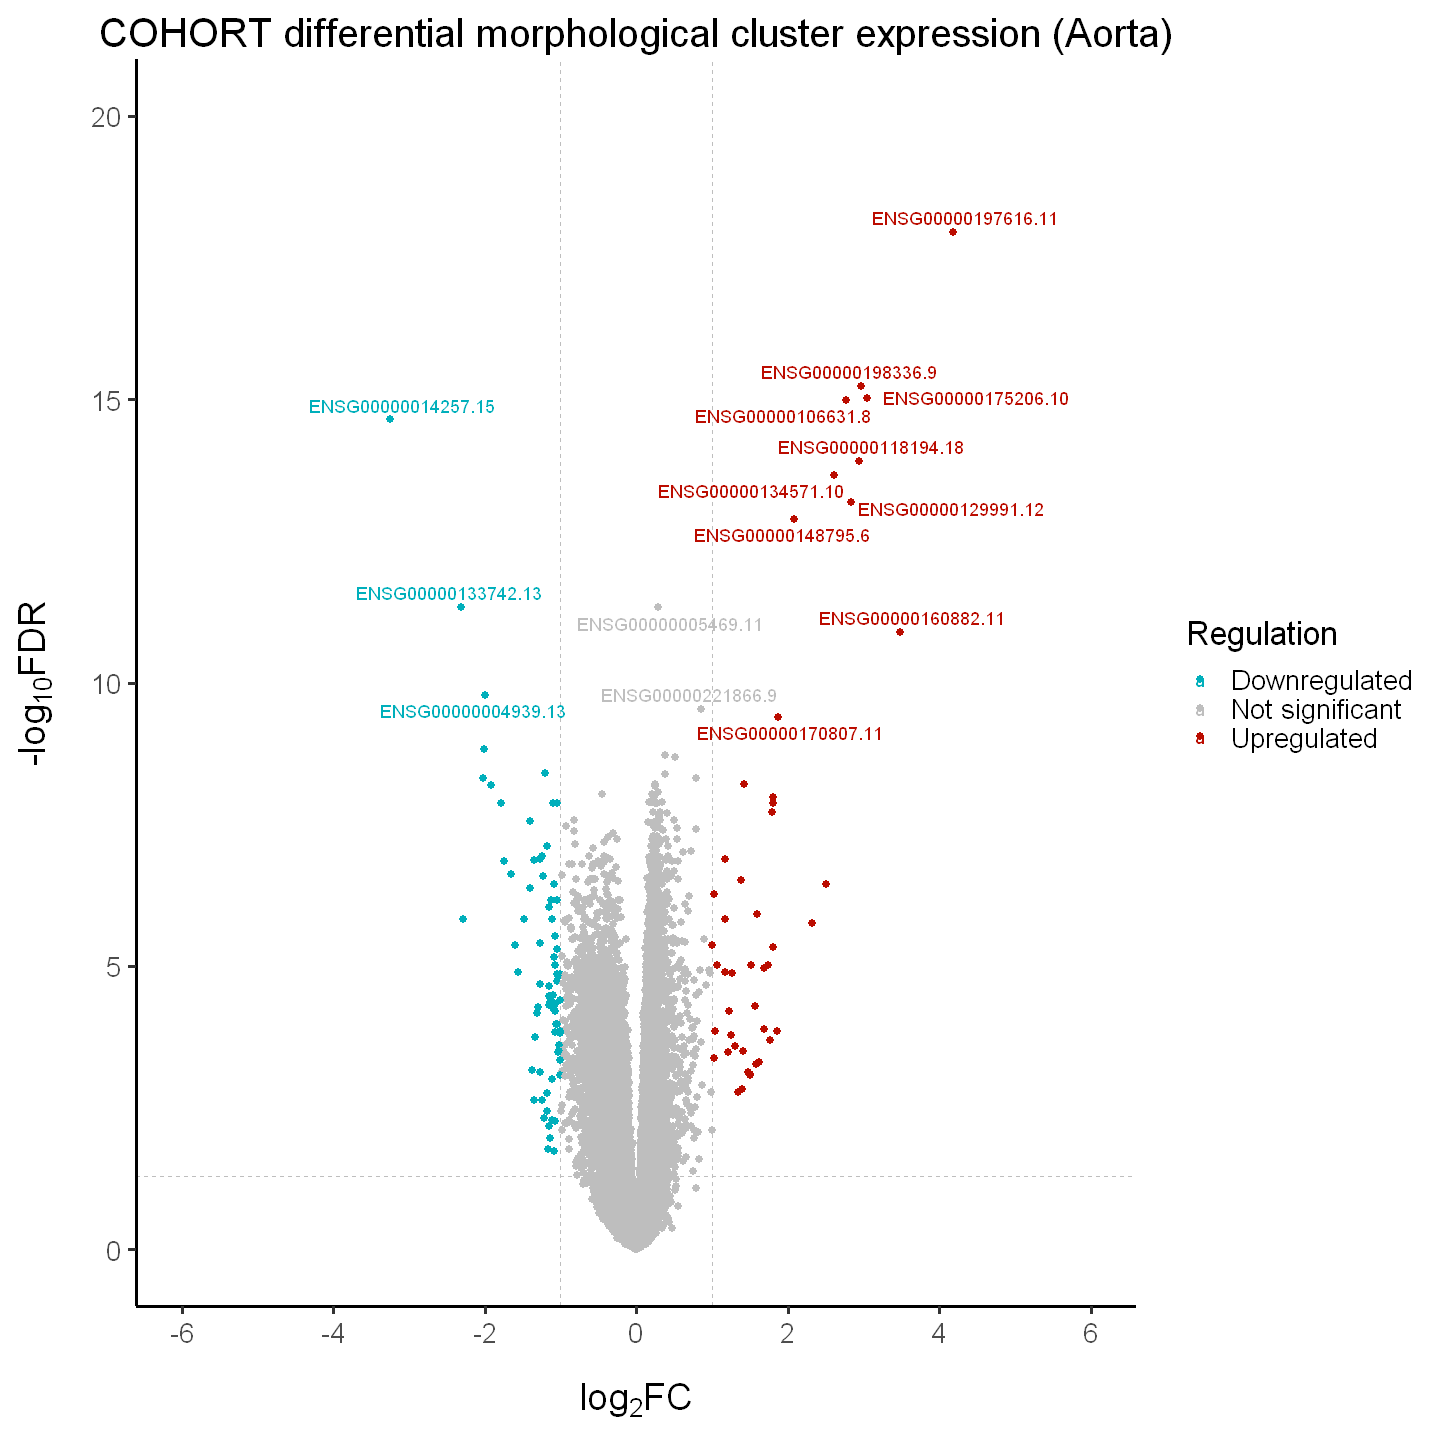

In [59]:
library(tidyverse) # includes ggplot2, for data visualisation. dplyr, for data manipulation.
library(RColorBrewer) # for a colourful plot
library(ggrepel) # for nice annotations
##### COHORT volcanoplot
d_topTags <- topTags(qlf, n = 28105)[["table"]]
# Biostatsquid theme
theme_set(theme_classic(base_size = 20) +
            theme(
              axis.title.y = element_text(face = "bold", margin = margin(0,20,0,0), size = rel(1.1), color = 'black'),
              axis.title.x = element_text(hjust = 0.5, face = "bold", margin = margin(20,0,0,0), size = rel(1.1), color = 'black'),
              plot.title = element_text(hjust = 0.5)
            ))
# Add a column to the data frame to specify if they are UP- or DOWN- regulated 
d_topTags$diffexpressed <- "NO"  # add a column diffexpressed with only NO  
# if log2Foldchange > 1 and FDR < 0.05, set as "UP"  
d_topTags$diffexpressed[d_topTags$logFC > 1 & d_topTags$FDR < 0.05] <- "UP"
# if log2Foldchange < -1 and FDR < 0.05, set as "DOWN"
d_topTags$diffexpressed[d_topTags$logFC < -1 & d_topTags$FDR < 0.05] <- "DOWN"

# Create a new column "delabel" to de, that will contain the name of the top 15 differentially expressed genes (NA in case they are not)
data_test<- d_topTags
names <- rownames(d_topTags)
d_topTags <- cbind(names,d_topTags)
d_topTags$delabel <- ifelse(d_topTags$names %in% head(d_topTags[order(d_topTags$FDR), "names"], 15), d_topTags$names, NA)
dim(d_topTags)
sum(d_topTags$diffexpressed == "UP")
sum(d_topTags$diffexpressed == "DOWN")
# Set plot size: width and height in inches
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = d_topTags, aes(x = logFC, y = -log10(FDR), col = diffexpressed, label = delabel)) +
  geom_vline(xintercept = c(-1, 1), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') + 
  geom_point(size = 2) + 
  scale_color_manual(values = c("#00AFBB", "grey", "#bb0c00"), # to set the colours of our variable  
                     labels = c("Downregulated", "Not significant", "Upregulated")) + 
  coord_cartesian(ylim = c(0, 20), xlim = c(-6, 6)) + # set the limits of the axes
  labs(color = 'Regulation', #legend_title, 
       x = expression("log"[2]*"FC"), y = expression("-log"[10]*"FDR")) + 
  scale_x_continuous(breaks = seq(-10, 10, 2)) + # to customise the breaks in the x axis
  ggtitle('COHORT differential morphological cluster expression (Aorta)') +
  geom_text_repel(max.overlaps = Inf) # To show all labels